In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
df=pd.read_csv('d.csv')

In [5]:
#partition X and y
y=df['Outcome']
X=df.drop('Outcome',axis=1)
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
df.shape

(768, 9)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

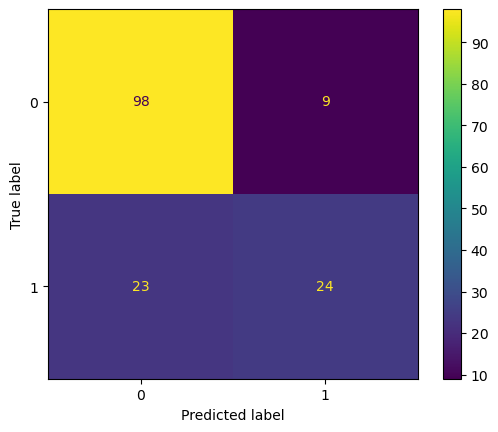

In [15]:
# SVM
from sklearn.svm import SVC
X_train_svm,X_test_svm,y_train_svm,y_test_svm=train_test_split(X,y,test_size = 0.20, random_state=0)
svm=SVC(max_iter=1000,random_state=40)
svm.fit(X_train_svm,y_train_svm)
y_test_predicted_svm=svm.predict(X_test_svm)
ConfusionMatrixDisplay.from_estimator(svm, X_test_svm, y_test_svm)
plt.show()

In [17]:
accuracy=accuracy_score(y_test_svm,y_test_predicted_svm)
print ('Accuracy of Support Vector Machine',accuracy)

Accuracy of Support Vector Machine 0.7922077922077922


In [19]:
print(classification_report(y_test_svm,y_test_predicted_svm))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



In [21]:
# Logistic
from sklearn.linear_model import LogisticRegression
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(X,y,test_size = 0.20, random_state=0)
lr=LogisticRegression(max_iter=1000,random_state=40)
lr.fit(X_train_log,y_train_log)

LogisticRegression(max_iter=1000, random_state=40)

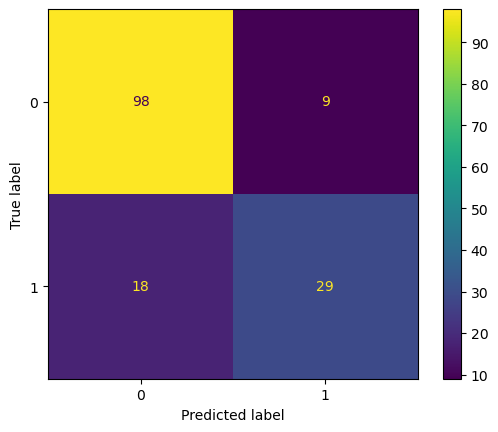

In [23]:
y_test_predicted_log=lr.predict(X_test_log)
ConfusionMatrixDisplay.from_estimator(lr, X_test_log, y_test_log)
plt.show()

In [25]:
accuracy=accuracy_score(y_test_log,y_test_predicted_log)
print ('Accuracy of Logistic Regeression',accuracy)

Accuracy of Logistic Regeression 0.8246753246753247


In [27]:
print(classification_report(y_test_log,y_test_predicted_log))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [29]:
#knn
from sklearn.neighbors import KNeighborsClassifier
X_train_knn,X_test_knn,y_train_knn,y_test_knn=train_test_split(X,y,test_size = 0.2, random_state=0)
knn= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier()

In [31]:
y_test_predicted_knn=knn.predict(X_test_knn)

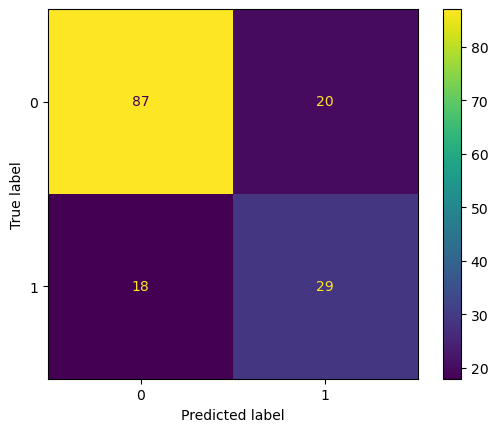

In [33]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_knn, y_test_knn)
plt.show()

In [35]:
accuracy=accuracy_score(y_test_knn,y_test_predicted_knn)
print ('Accuracy of KNN',accuracy)

Accuracy of KNN 0.7532467532467533


In [37]:
print(classification_report(y_test_knn,y_test_predicted_knn))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



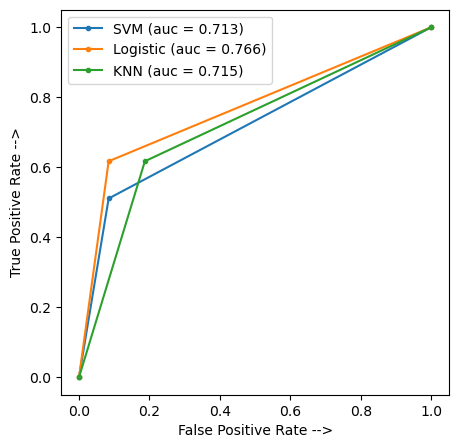

In [39]:
from sklearn .metrics import roc_curve,auc
# SVM

SVM_fpr,SVM_tpr,threshold=roc_curve(y_test_svm,y_test_predicted_svm)
auc_SVM=auc(SVM_fpr,SVM_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(SVM_fpr, SVM_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_SVM)

#Logistic

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test_log,y_test_predicted_log)
auc_logistic=auc(logistic_fpr,logistic_tpr)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

#knn
KNN_fpr,KNN_tpr,threshold=roc_curve(y_test_knn,y_test_predicted_knn)
auc_KNN=auc(KNN_fpr,KNN_tpr)
plt.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN (auc = %0.3f)' % auc_KNN)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend(loc='best')

plt.show()

<Figure size 800x600 with 0 Axes>

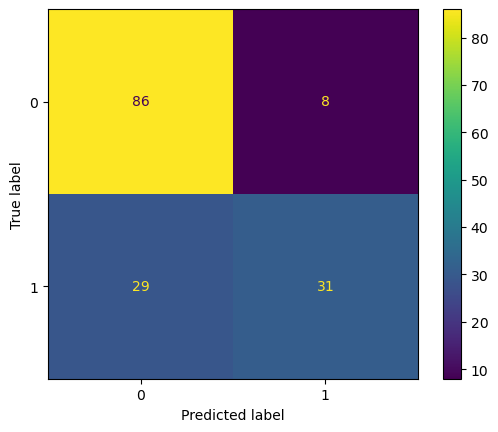

Accuracy of SVM_Linear 0.7597402597402597
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        94
           1       0.79      0.52      0.63        60

    accuracy                           0.76       154
   macro avg       0.77      0.72      0.72       154
weighted avg       0.77      0.76      0.75       154



In [41]:
# SVM 2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train0, X_test0, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
X_train0 = scaler.fit_transform(X_train0)
X_test0 = scaler.transform(X_test0)

# Train SVM model
model = SVC(kernel='linear', C=1)
model.fit(X_train0, y_train)

# Make predictions
y_pred = model.predict(X_test0)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test0, y_test)
plt.show()

accuracy=accuracy_score(y_test,y_pred)
print ('Accuracy of SVM_Linear',accuracy)

print(classification_report(y_test,y_pred))

<Figure size 800x600 with 0 Axes>

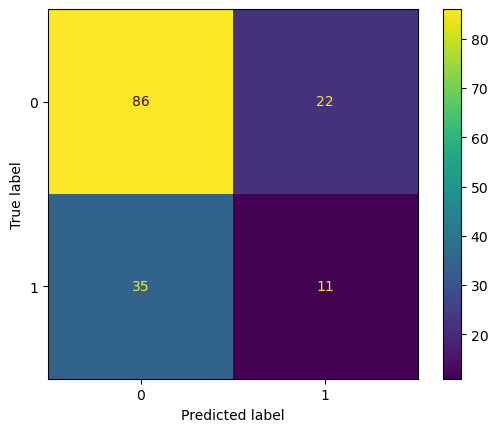

Accuracy of SVM_sigmoid 0.6298701298701299
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       108
           1       0.33      0.24      0.28        46

    accuracy                           0.63       154
   macro avg       0.52      0.52      0.51       154
weighted avg       0.60      0.63      0.61       154



In [43]:
# SVM 2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train1)
X_test2 = scaler.transform(X_test1)

# Train SVM model
model = SVC(kernel='sigmoid', C=1)
model.fit(X_train2, y_train)

# Make predictions
y_pred1 = model.predict(X_test2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test2, y_test1)
plt.show()

accuracy=accuracy_score(y_test1,y_pred1)
print ('Accuracy of SVM_sigmoid',accuracy)

print(classification_report(y_test1,y_pred1))

<Figure size 800x600 with 0 Axes>

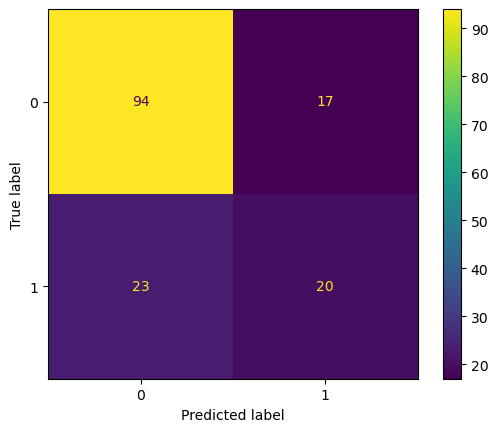

Accuracy of SVM_Poly 0.7402597402597403
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       111
           1       0.54      0.47      0.50        43

    accuracy                           0.74       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.73      0.74      0.73       154



In [45]:
# SVM 2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train3)
X_test4 = scaler.transform(X_test3)

# Train SVM model
model = SVC(kernel='poly', C=1)
model.fit(X_train3, y_train3)

# Make predictions
y_pred3 = model.predict(X_test3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test3, y_test3)
plt.show()

accuracy=accuracy_score(y_test3,y_pred3)
print ('Accuracy of SVM_Poly',accuracy)

print(classification_report(y_test3,y_pred3))

<Figure size 800x600 with 0 Axes>

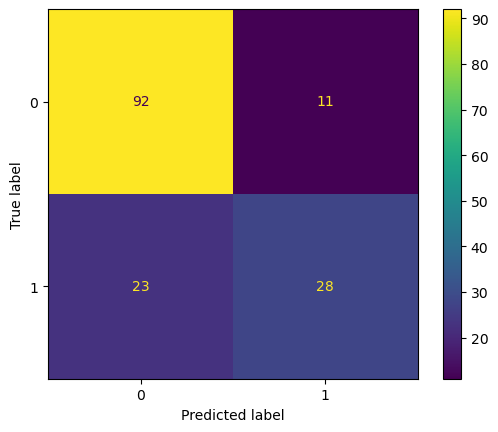

Accuracy of SVM_Rbf 0.7792207792207793
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       103
           1       0.72      0.55      0.62        51

    accuracy                           0.78       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



In [47]:
# SVM 2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
X_train6 = scaler.fit_transform(X_train5)
X_test6= scaler.transform(X_test5)

# Train SVM model
model = SVC(kernel='rbf', C=1)
model.fit(X_train6, y_train5)

# Make predictions
y_pred5 = model.predict(X_test6)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test6, y_test5)
plt.show()

accuracy=accuracy_score(y_test5,y_pred5)
print ('Accuracy of SVM_Rbf',accuracy)

print(classification_report(y_test5,y_pred5))

<Figure size 800x600 with 0 Axes>

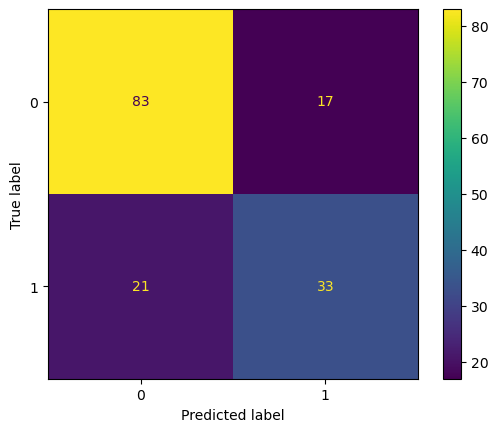

Accuracy of RFC 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Split the dataset into training and testing sets
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X, y, test_size=0.2)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_rfc, y_train_rfc)

# Make predictions on the test set
y_pred_rfc= clf.predict(X_test_rfc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(clf, X_test_rfc, y_test_rfc)
plt.show()

accuracy=accuracy_score(y_test_rfc,y_pred_rfc)
print ('Accuracy of RFC',accuracy)

print(classification_report(y_test_rfc,y_pred_rfc))

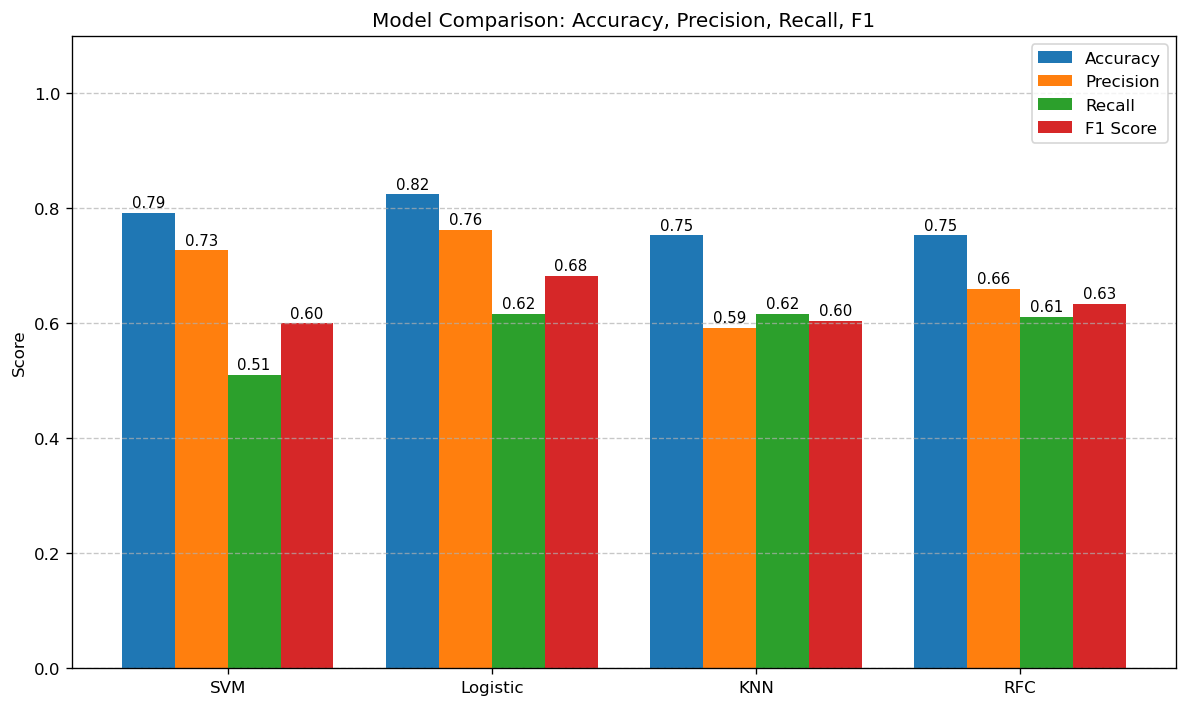

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collecting all metrics
models = ['SVM', 'Logistic', 'KNN', 'RFC']

accuracies = [
    accuracy_score(y_test_svm, y_test_predicted_svm),
    accuracy_score(y_test_log, y_test_predicted_log),
    accuracy_score(y_test_knn, y_test_predicted_knn),
    accuracy_score(y_test_rfc, y_pred_rfc)
]

precisions = [
    precision_score(y_test_svm, y_test_predicted_svm),
    precision_score(y_test_log, y_test_predicted_log),
    precision_score(y_test_knn, y_test_predicted_knn),
    precision_score(y_test_rfc, y_pred_rfc)
]

recalls = [
    recall_score(y_test_svm, y_test_predicted_svm),
    recall_score(y_test_log, y_test_predicted_log),
    recall_score(y_test_knn, y_test_predicted_knn),
    recall_score(y_test_rfc, y_pred_rfc)
]

f1s = [
    f1_score(y_test_svm, y_test_predicted_svm),
    f1_score(y_test_log, y_test_predicted_log),
    f1_score(y_test_knn, y_test_predicted_knn),
    f1_score(y_test_rfc, y_pred_rfc)
]

# Bar width & x locations
bar_width = 0.2
x = np.arange(len(models))

plt.figure(figsize=(10, 6), dpi=120)

# Plot bars and add value labels
def add_bars_with_labels(x_pos, values, label):
    bars = plt.bar(x_pos, values, width=bar_width, label=label)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=9)

add_bars_with_labels(x, accuracies, 'Accuracy')
add_bars_with_labels(x + bar_width, precisions, 'Precision')
add_bars_with_labels(x + 2*bar_width, recalls, 'Recall')
add_bars_with_labels(x + 3*bar_width, f1s, 'F1 Score')

plt.xticks(x + 1.5 * bar_width, models)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy, Precision, Recall, F1")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


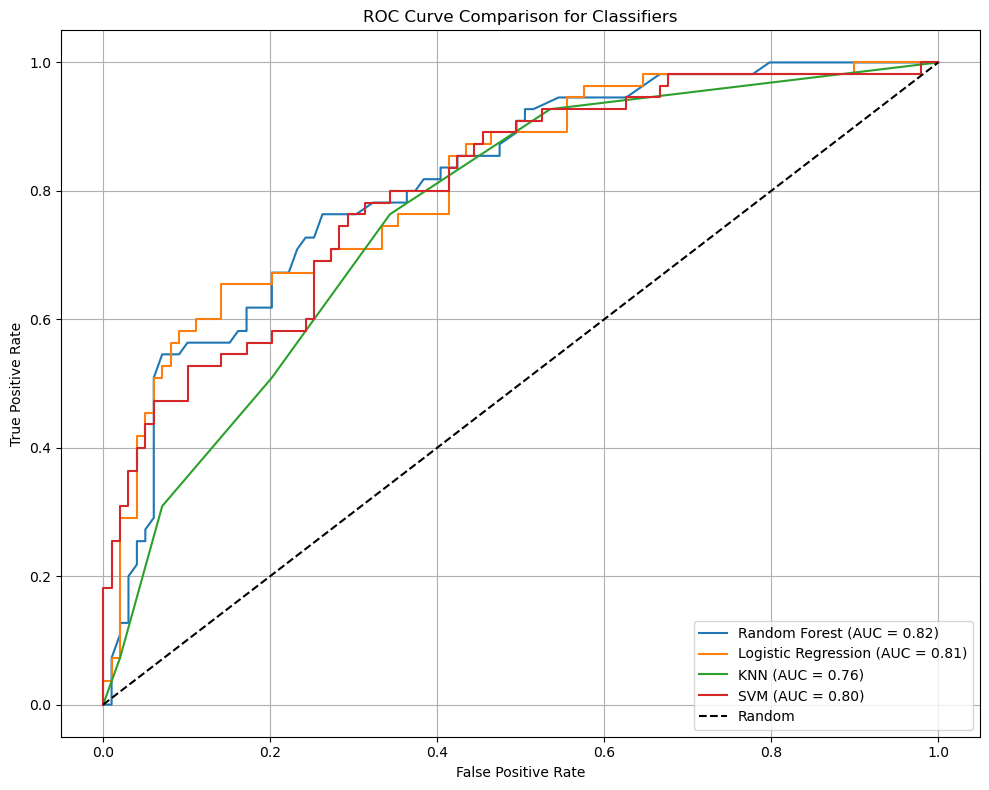

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv('d.csv')

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)  # Enable probability output for ROC
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_scaled)[:, 1]
    else:
        probs = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.title('ROC Curve Comparison for Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



=== ROC Curve for 3-Fold Cross-Validation ===


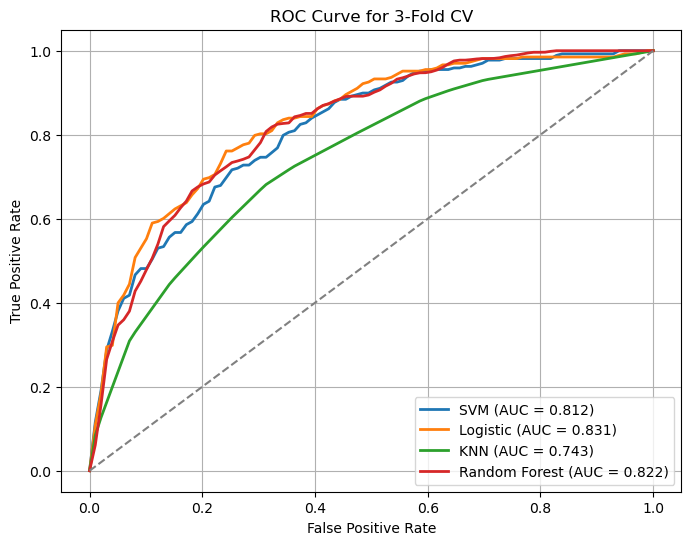


=== ROC Curve for 5-Fold Cross-Validation ===


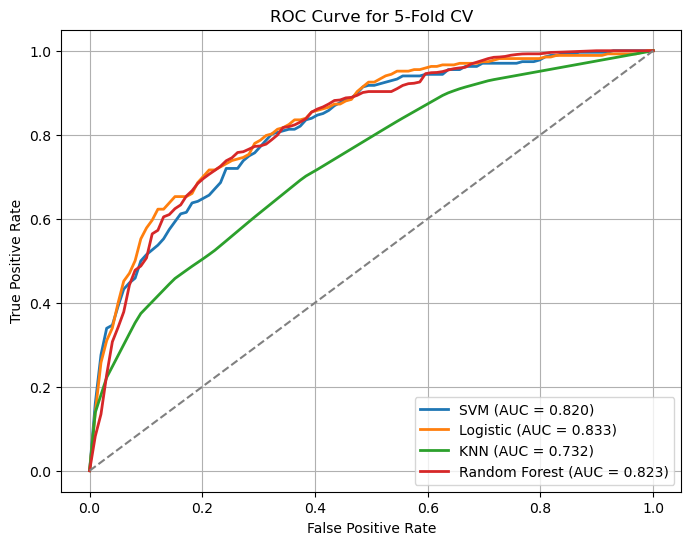


=== ROC Curve for 7-Fold Cross-Validation ===


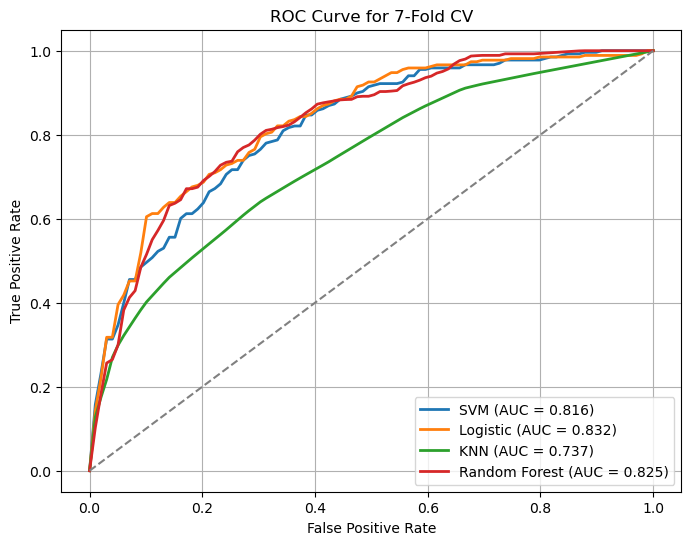


=== ROC Curve for 9-Fold Cross-Validation ===


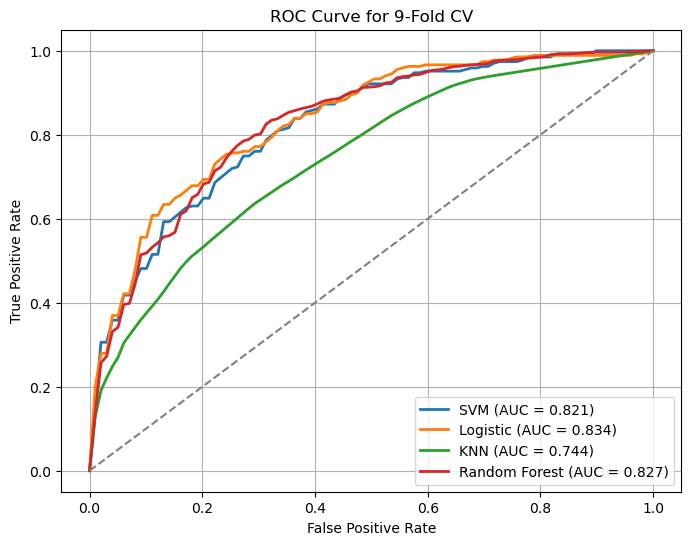


=== ROC Curve for 10-Fold Cross-Validation ===


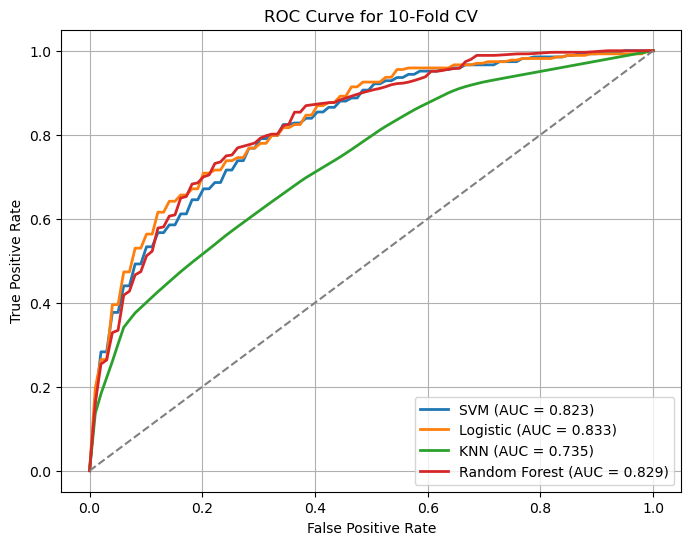


=== ROC Curve for 13-Fold Cross-Validation ===


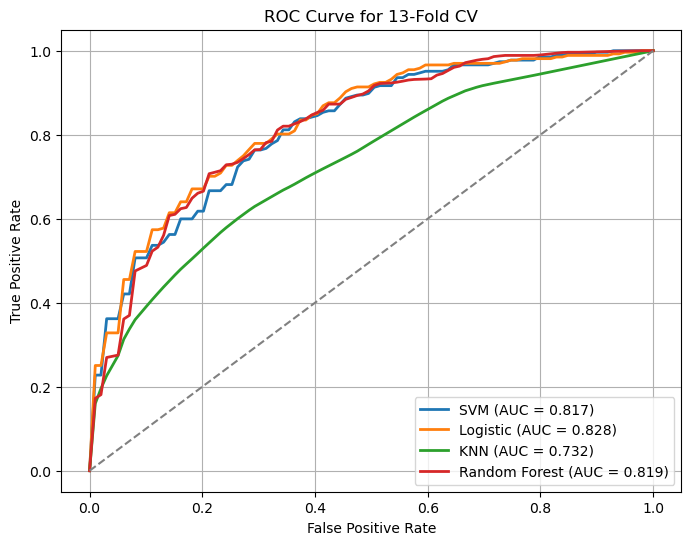


=== ROC Curve for 15-Fold Cross-Validation ===


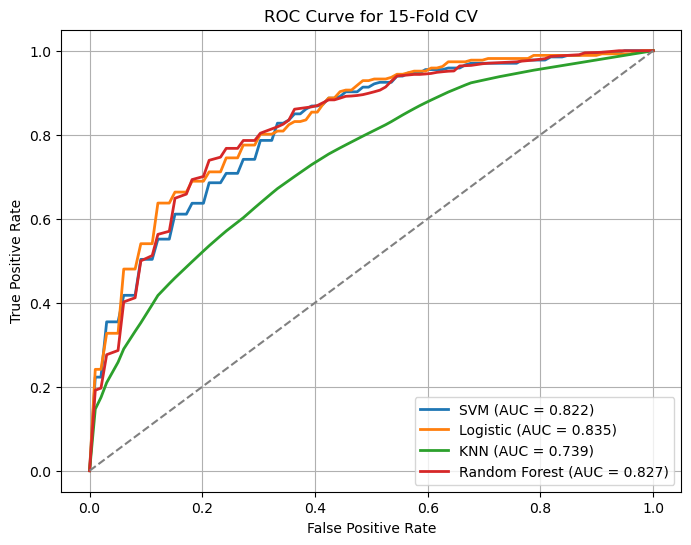

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
df = pd.read_csv('d.csv')  # path to your dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Models dictionary
models = {
    "SVM": SVC(probability=True, max_iter=1000, random_state=40),
    "Logistic": LogisticRegression(max_iter=1000, random_state=40),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=40)
}

# Folds to test
folds_list = [3, 5, 7, 9, 10, 13, 15]

# Main loop for each fold
for fold_count in folds_list:
    cv = StratifiedKFold(n_splits=fold_count, shuffle=True, random_state=42)
    plt.figure(figsize=(8, 6))
    print(f"\n=== ROC Curve for {fold_count}-Fold Cross-Validation ===")

    for model_name, model in models.items():
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for train_idx, test_idx in cv.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_train, y_train)
            y_probs = model.predict_proba(X_test)[:, 1]

            fpr, tpr, _ = roc_curve(y_test, y_probs)
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)

        plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.3f})', lw=2)

    # Plotting ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve for {fold_count}-Fold CV')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



--- 3-Fold Cross-Validation ---
Average Accuracy: 0.7578
Average AUC: 0.8319


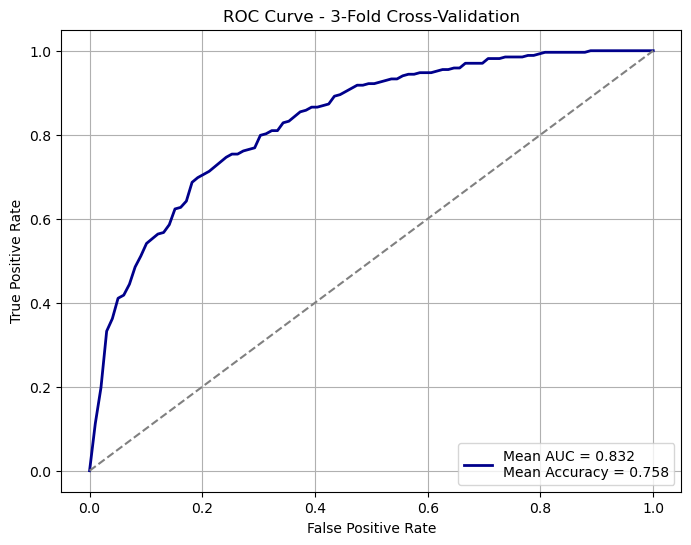


--- 5-Fold Cross-Validation ---
Average Accuracy: 0.7695
Average AUC: 0.8357


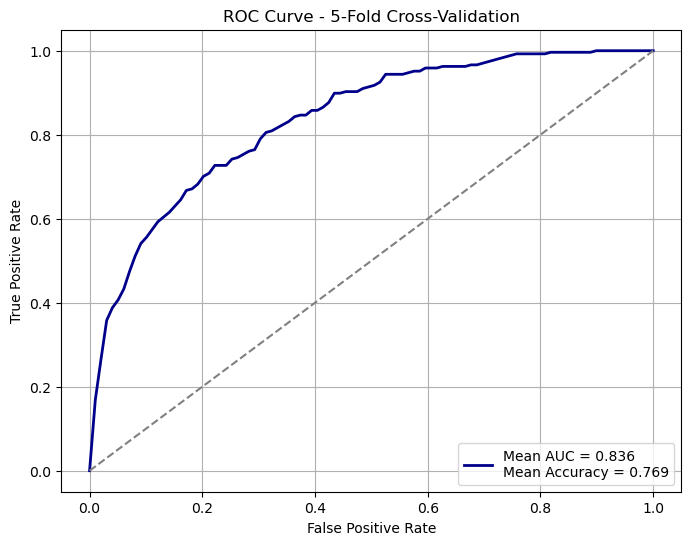


--- 7-Fold Cross-Validation ---
Average Accuracy: 0.7642
Average AUC: 0.8340


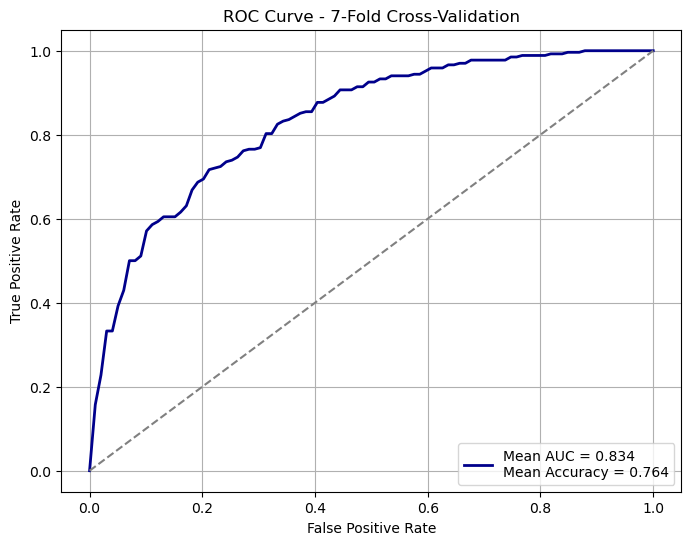


--- 9-Fold Cross-Validation ---
Average Accuracy: 0.7695
Average AUC: 0.8342


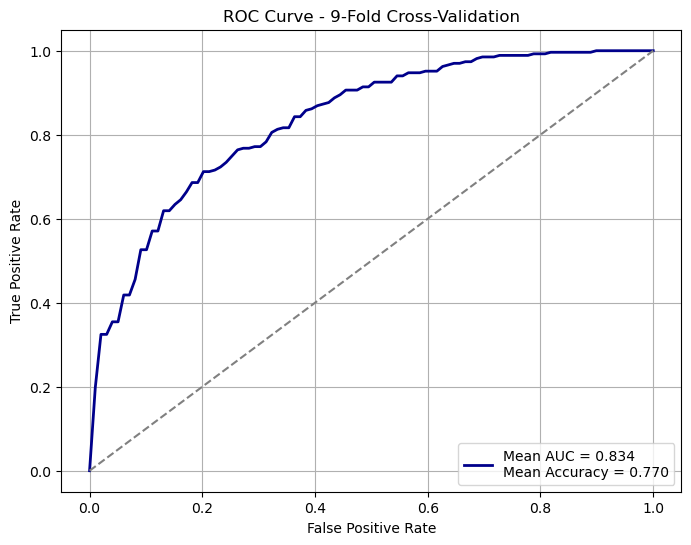


--- 10-Fold Cross-Validation ---
Average Accuracy: 0.7708
Average AUC: 0.8374


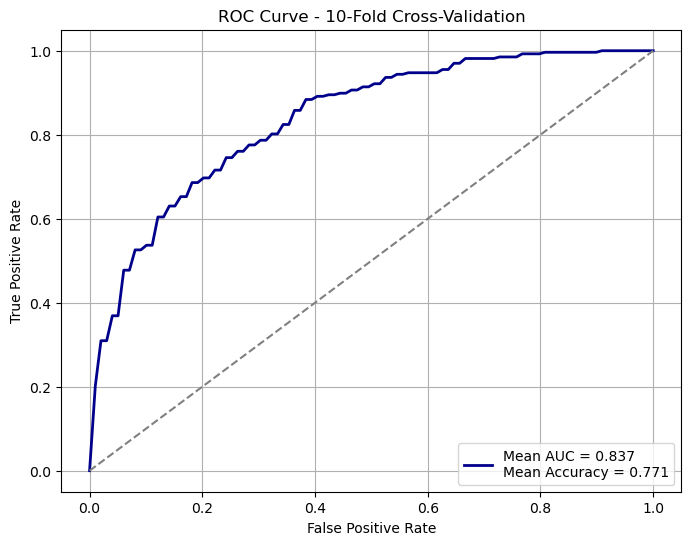

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score

# Load your dataset (update path as needed)
df = pd.read_csv('d.csv')  # Replace with your dataset path
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define base models
logreg = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, kernel='rbf', random_state=42)

# Define hybrid model using soft voting
hybrid_model = VotingClassifier(estimators=[
    ('lr', logreg),
    ('svm', svm)
], voting='soft')

# List of k values for cross-validation
folds_list = [3, 5, 7, 9, 10]

# Loop through each k
for k in folds_list:
    print(f"\n--- {k}-Fold Cross-Validation ---")
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    tprs = []
    aucs = []
    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        hybrid_model.fit(X_train, y_train)
        y_prob = hybrid_model.predict_proba(X_test)[:, 1]
        y_pred = hybrid_model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accs.append(acc)

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Calculate mean ROC and Accuracy
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    mean_acc = np.mean(accs)

    # Display performance
    print(f"Average Accuracy: {mean_acc:.4f}")
    print(f"Average AUC: {mean_auc:.4f}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='darkblue', lw=2,
             label=f'Mean AUC = {mean_auc:.3f}\nMean Accuracy = {mean_acc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {k}-Fold Cross-Validation')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



--- 3-Fold Cross-Validation ---
Average Accuracy: 0.7617
Average AUC: 0.8402


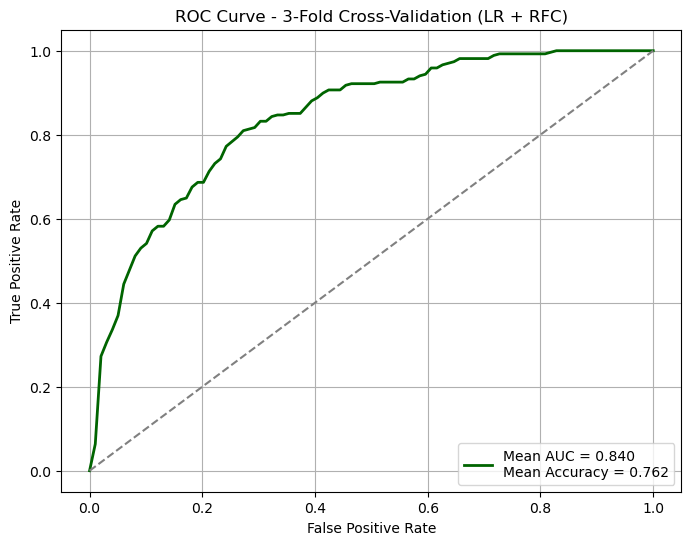


--- 5-Fold Cross-Validation ---
Average Accuracy: 0.7617
Average AUC: 0.8395


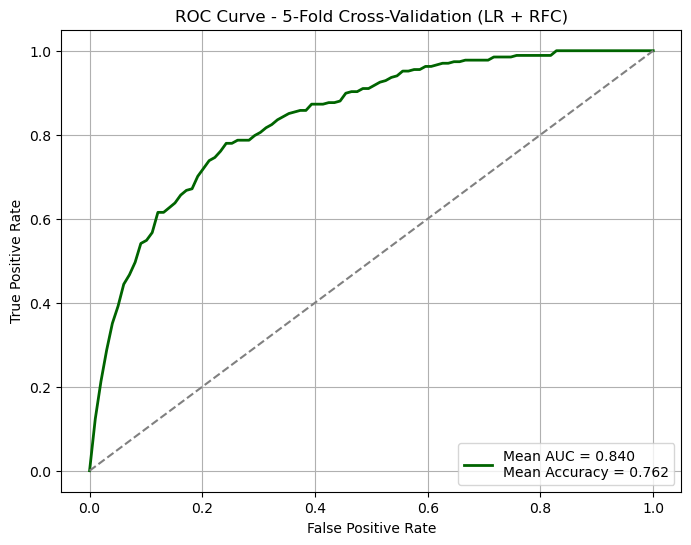


--- 7-Fold Cross-Validation ---
Average Accuracy: 0.7656
Average AUC: 0.8384


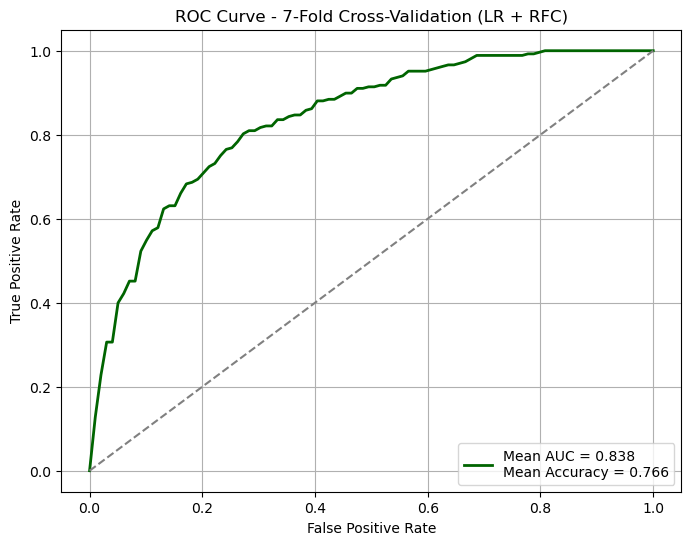


--- 9-Fold Cross-Validation ---
Average Accuracy: 0.7708
Average AUC: 0.8393


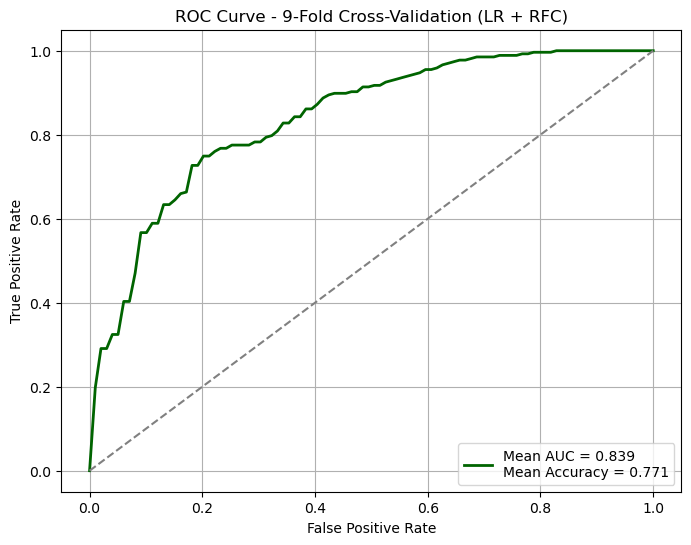


--- 10-Fold Cross-Validation ---
Average Accuracy: 0.7669
Average AUC: 0.8438


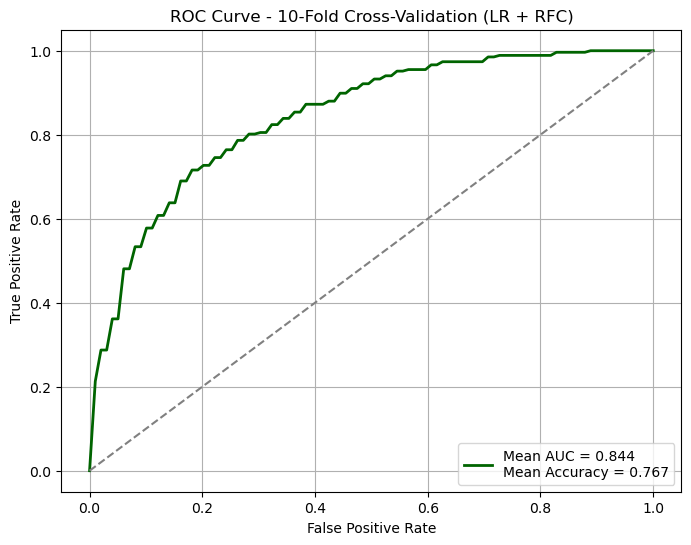

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score

# Load dataset
df = pd.read_csv('d.csv')  # Update path if needed
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define base models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfc = RandomForestClassifier(n_estimators=200, random_state=42)

# Hybrid model (soft voting)
hybrid_model = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('rfc', rfc)
    ],
    voting='soft'
)

# List of k values
folds_list = [3, 5, 7, 9, 10]

# Loop through each k
for k in folds_list:
    print(f"\n--- {k}-Fold Cross-Validation ---")
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    tprs = []
    aucs = []
    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Fit and predict
        hybrid_model.fit(X_train, y_train)
        y_prob = hybrid_model.predict_proba(X_test)[:, 1]
        y_pred = hybrid_model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        accs.append(acc)

        # ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # Interpolated TPR
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Mean results
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    mean_acc = np.mean(accs)

    # Print performance
    print(f"Average Accuracy: {mean_acc:.4f}")
    print(f"Average AUC: {mean_auc:.4f}")

    # Plot ROC
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='darkgreen', lw=2,
             label=f'Mean AUC = {mean_auc:.3f}\nMean Accuracy = {mean_acc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {k}-Fold Cross-Validation (LR + RFC)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



--- 3-Fold Cross-Validation ---
Average Accuracy: 0.7565
Average AUC: 0.8321


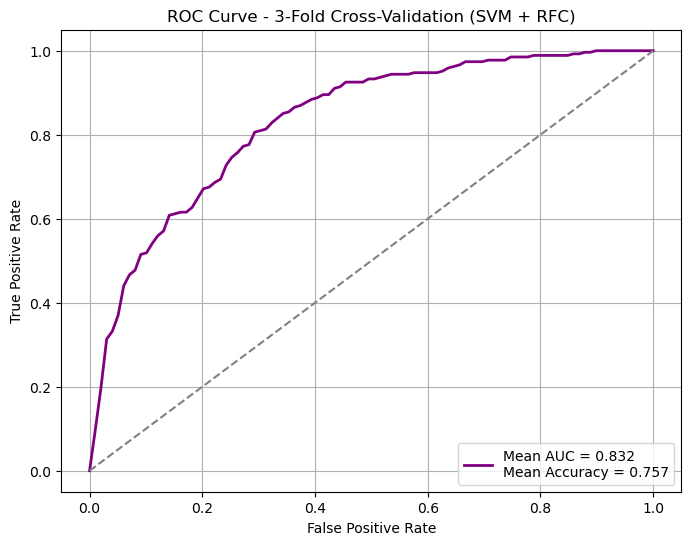


--- 5-Fold Cross-Validation ---
Average Accuracy: 0.7578
Average AUC: 0.8364


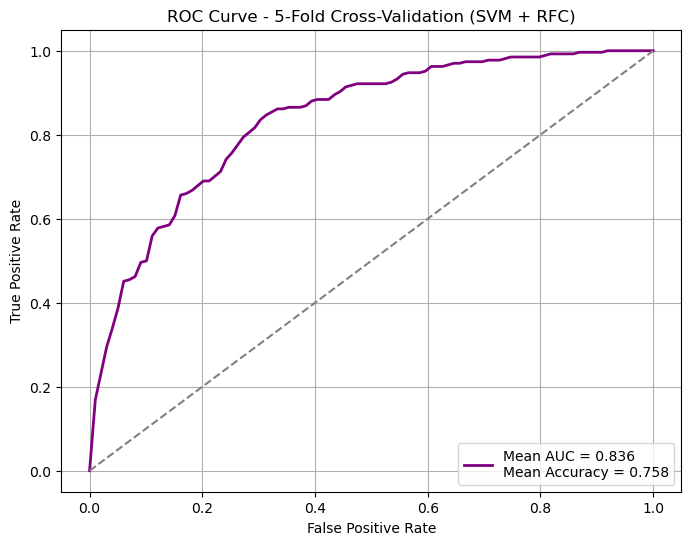


--- 7-Fold Cross-Validation ---
Average Accuracy: 0.7565
Average AUC: 0.8333


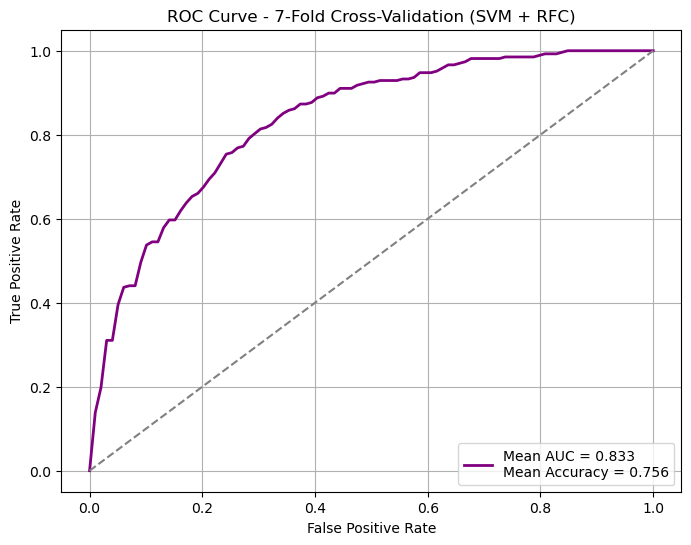


--- 9-Fold Cross-Validation ---
Average Accuracy: 0.7630
Average AUC: 0.8360


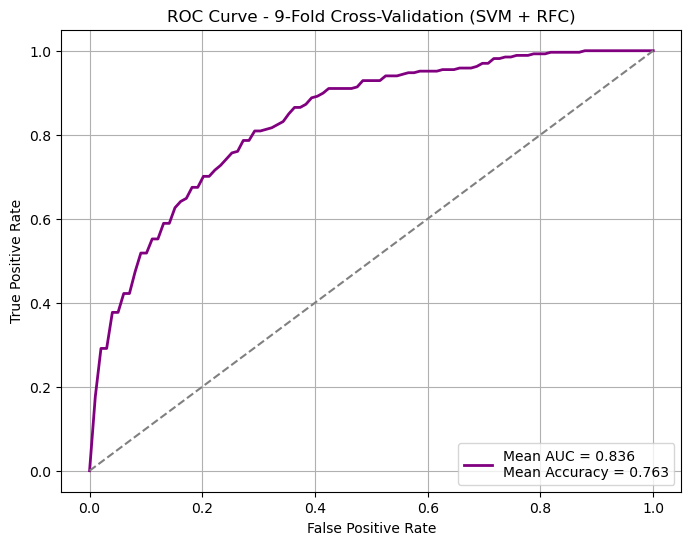


--- 10-Fold Cross-Validation ---
Average Accuracy: 0.7617
Average AUC: 0.8397


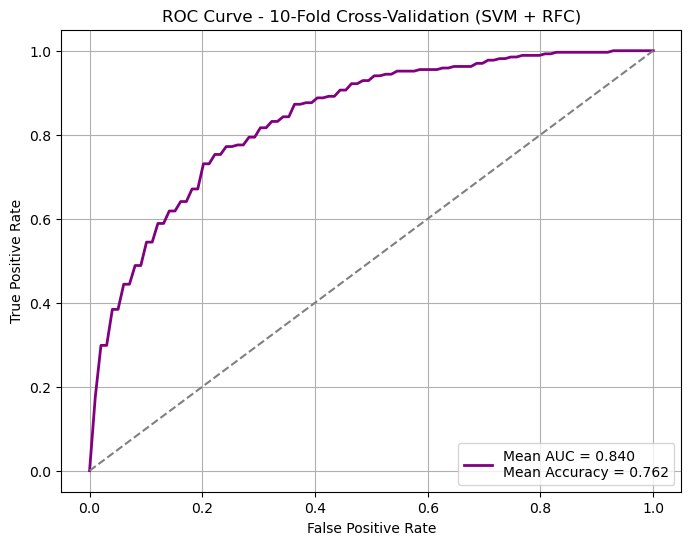

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score

# Load dataset
df = pd.read_csv('d.csv')  # Update path if needed
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define base models
svm = SVC(probability=True, kernel='rbf', random_state=42)
rfc = RandomForestClassifier(n_estimators=200, random_state=42)

# Hybrid model (soft voting)
hybrid_model = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('rfc', rfc)
    ],
    voting='soft'
)

# List of k values
folds_list = [3, 5, 7, 9, 10]

# Loop through each k
for k in folds_list:
    print(f"\n--- {k}-Fold Cross-Validation ---")
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    tprs = []
    aucs = []
    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Fit and predict
        hybrid_model.fit(X_train, y_train)
        y_prob = hybrid_model.predict_proba(X_test)[:, 1]
        y_pred = hybrid_model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        accs.append(acc)

        # ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # Interpolated TPR
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Mean results
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    mean_acc = np.mean(accs)

    # Print performance
    print(f"Average Accuracy: {mean_acc:.4f}")
    print(f"Average AUC: {mean_auc:.4f}")

    # Plot ROC
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='purple', lw=2,
             label=f'Mean AUC = {mean_auc:.3f}\nMean Accuracy = {mean_acc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {k}-Fold Cross-Validation (SVM + RFC)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



--- 3-Fold Cross-Validation ---
Average Accuracy: 0.7617
Average AUC: 0.8402


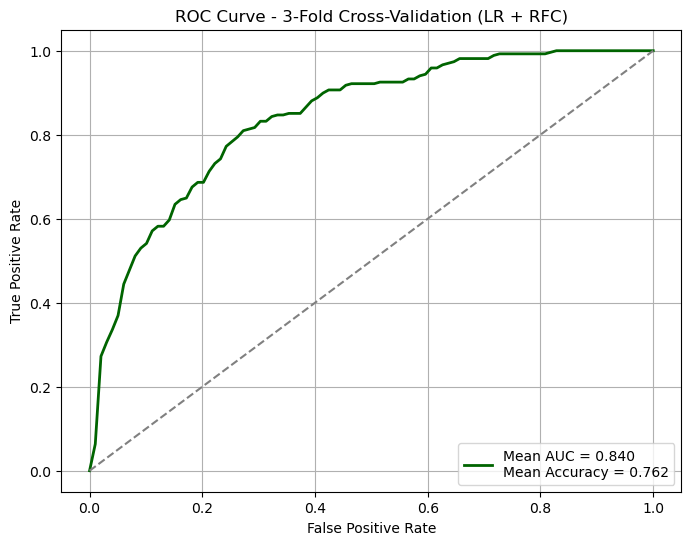


--- 5-Fold Cross-Validation ---
Average Accuracy: 0.7617
Average AUC: 0.8395


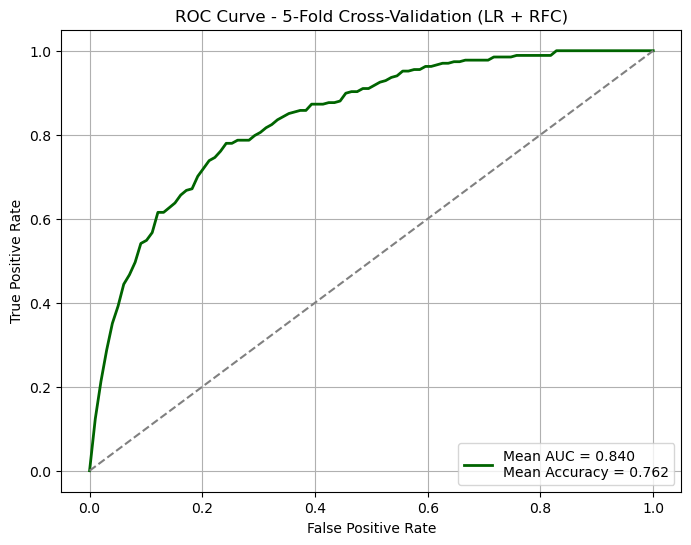


--- 7-Fold Cross-Validation ---
Average Accuracy: 0.7656
Average AUC: 0.8384


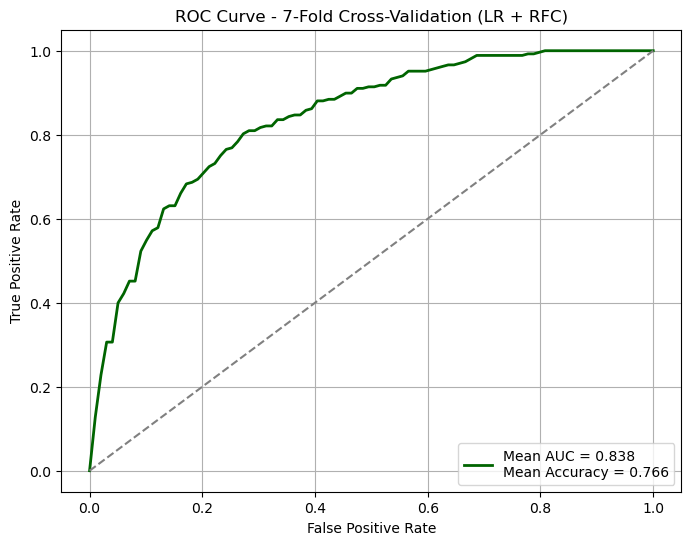


--- 9-Fold Cross-Validation ---
Average Accuracy: 0.7708
Average AUC: 0.8393


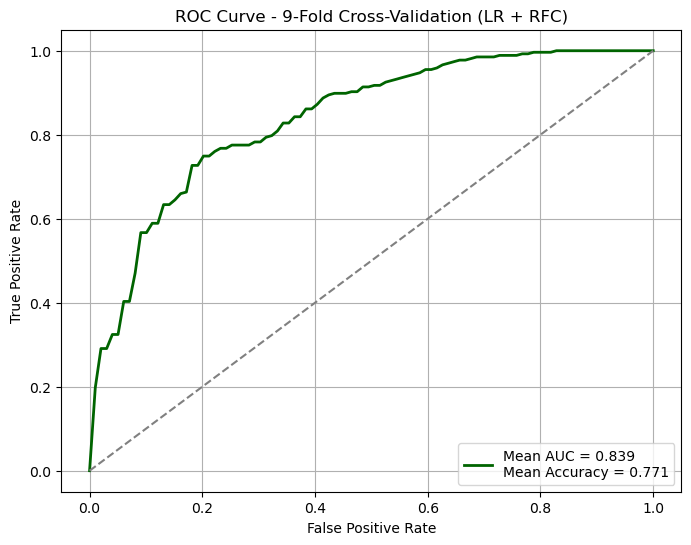


--- 10-Fold Cross-Validation ---
Average Accuracy: 0.7669
Average AUC: 0.8438


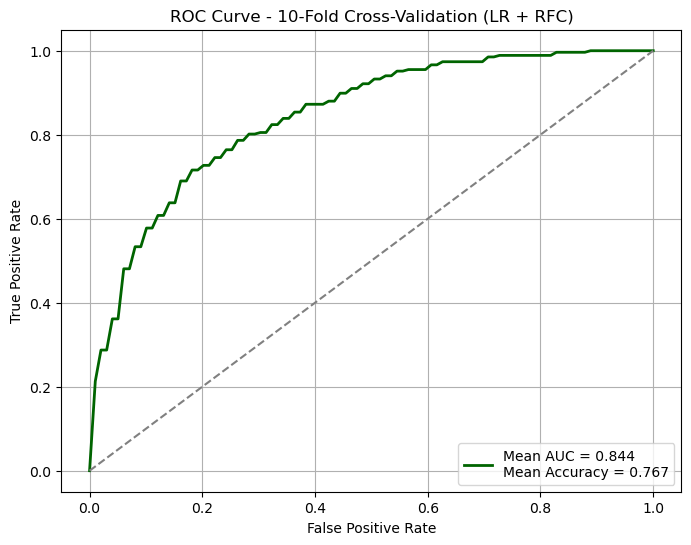

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score

# Load dataset
df = pd.read_csv('d.csv')  # Update path if needed
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define base models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfc = RandomForestClassifier(n_estimators=200, random_state=42)

# Hybrid model (soft voting)
hybrid_model = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('rfc', rfc)
    ],
    voting='soft'
)

# List of k values
folds_list = [3, 5, 7, 9, 10]

# Loop through each k
for k in folds_list:
    print(f"\n--- {k}-Fold Cross-Validation ---")
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    tprs = []
    aucs = []
    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Fit and predict
        hybrid_model.fit(X_train, y_train)
        y_prob = hybrid_model.predict_proba(X_test)[:, 1]
        y_pred = hybrid_model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        accs.append(acc)

        # ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # Interpolated TPR
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Mean results
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    mean_acc = np.mean(accs)

    # Print performance
    print(f"Average Accuracy: {mean_acc:.4f}")
    print(f"Average AUC: {mean_auc:.4f}")

    # Plot ROC
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='darkgreen', lw=2,
             label=f'Mean AUC = {mean_auc:.3f}\nMean Accuracy = {mean_acc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {k}-Fold Cross-Validation (LR + RFC)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


In [71]:
pip install deap scikit-learn pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import random
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('d.csv')  # Make sure this has 'Outcome' as target
X = df.drop('Outcome', axis=1)
y = df['Outcome']
feature_names = X.columns.tolist()
n_features = X.shape[1]

# GA parameters
POP_SIZE = 20
N_GEN = 10
CX_PB = 0.5
MUT_PB = 0.2
RANDOM_STATE = 42

# Create GA fitness and individual definitions
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function using RFC + 3-fold inside GA
def eval_individual(individual):
    if sum(individual) == 0:
        return 0.0,  # Avoid division by zero or training on nothing
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    X_selected = X.iloc[:, selected_features]
    clf = RandomForestClassifier(random_state=RANDOM_STATE)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
    acc = []

    for train_idx, test_idx in cv.split(X_selected, y):
        clf.fit(X_selected.iloc[train_idx], y.iloc[train_idx])
        preds = clf.predict(X_selected.iloc[test_idx])
        acc.append(accuracy_score(y.iloc[test_idx], preds))

    return np.mean(acc),

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run GA
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
algorithms.eaSimple(pop, toolbox, cxpb=CX_PB, mutpb=MUT_PB, ngen=N_GEN, halloffame=hof, verbose=False)

# Best features selected
best_individual = hof[0]
selected_indices = [i for i, val in enumerate(best_individual) if val == 1]
selected_features = [feature_names[i] for i in selected_indices]

print("Selected Features by GA:", selected_features)

# Apply k-fold CV using selected features
X_selected = X[selected_features]
folds = [3, 5, 7, 9, 10]

for k in folds:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)
    accs = []

    for train_index, test_index in skf.split(X_selected, y):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = RandomForestClassifier(random_state=RANDOM_STATE)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        accs.append(accuracy_score(y_test, preds))

    print(f"\n{k}-Fold Cross Validation")
    print(f"Average Accuracy: {np.mean(accs):.4f}")


Selected Features by GA: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

3-Fold Cross Validation
Average Accuracy: 0.7708

5-Fold Cross Validation
Average Accuracy: 0.7551

7-Fold Cross Validation
Average Accuracy: 0.7473

9-Fold Cross Validation
Average Accuracy: 0.7551

10-Fold Cross Validation
Average Accuracy: 0.7655


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from deap import base, creator, tools, algorithms
import random

# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv('d.csv')  # Update path
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Standardize features for SVM
scaler = StandardScaler()
X = scaler.fit_transform(X)

n_features = X.shape[1]

# --------------------------
# GA Feature Selection Setup
# --------------------------
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_individual(individual):
    # If no features are selected, return 0 accuracy
    if sum(individual) == 0:
        return 0.0,

    X_selected = X_train[:, np.array(individual) == 1]
    model = SVC(kernel='rbf', probability=True, random_state=42)
    scores = cross_val_score(model, X_selected, y_train, cv=3)  # internal CV in GA
    return scores.mean(),

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# --------------------------
# K-Fold CV with GA + SVM
# --------------------------
folds_list = [3, 5, 7, 9, 10]

for k in folds_list:
    print(f"\n--- {k}-Fold Cross-Validation (GA + SVM) ---")
    cv_outer = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    fold_acc = []

    for train_idx, test_idx in cv_outer.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # GA optimization
        pop = toolbox.population(n=20)
        hof = tools.HallOfFame(1)
        algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10,
                            halloffame=hof, verbose=False)

        best_features = np.array(hof[0])
        selected_features = np.where(best_features == 1)[0]

        # Train SVM on selected features
        model = SVC(kernel='rbf', probability=True, random_state=42)
        model.fit(X_train[:, selected_features], y_train)
        y_pred = model.predict(X_test[:, selected_features])

        acc = accuracy_score(y_test, y_pred)
        fold_acc.append(acc)

    print(f"Accuracies per fold: {[round(a,4) for a in fold_acc]}")
    print(f"Average Accuracy: {np.mean(fold_acc):.4f}")



--- 3-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7578, 0.7812, 0.7422]
Average Accuracy: 0.7604

--- 5-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7143, 0.8052, 0.7792, 0.7516, 0.7255]
Average Accuracy: 0.7552

--- 7-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7636, 0.7545, 0.8273, 0.7727, 0.7364, 0.7431, 0.7431]
Average Accuracy: 0.7630

--- 9-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7558, 0.7442, 0.7558, 0.8353, 0.8, 0.6588, 0.7882, 0.6941, 0.7647]
Average Accuracy: 0.7552

--- 10-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7403, 0.7013, 0.7532, 0.8701, 0.7792, 0.7922, 0.7532, 0.7273, 0.7632, 0.7368]
Average Accuracy: 0.7617



--- 3-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7578, 0.7812, 0.7266]
Average Accuracy: 0.7552
Average AUC: 0.8055


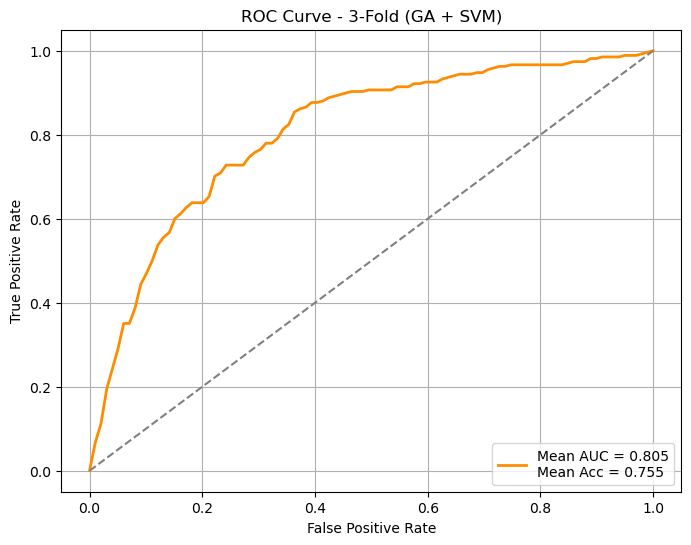


--- 5-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7532, 0.7987, 0.7662, 0.7451, 0.7451]
Average Accuracy: 0.7617
Average AUC: 0.7982


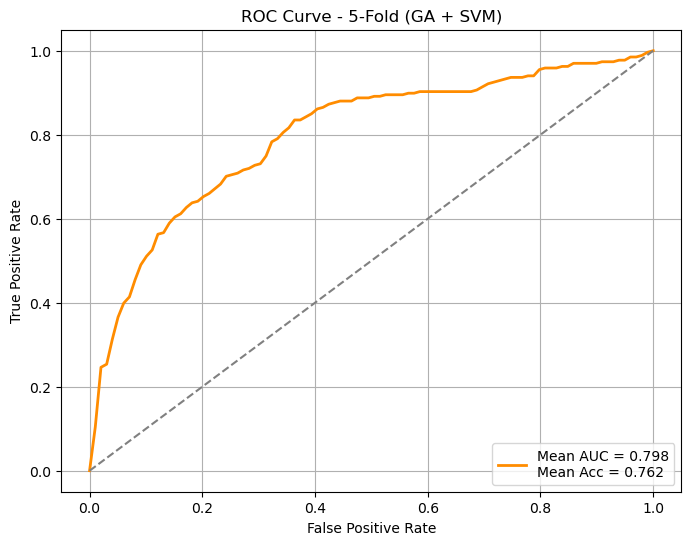


--- 7-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7182, 0.7364, 0.8273, 0.7636, 0.7364, 0.7339, 0.7064]
Average Accuracy: 0.7460
Average AUC: 0.8202


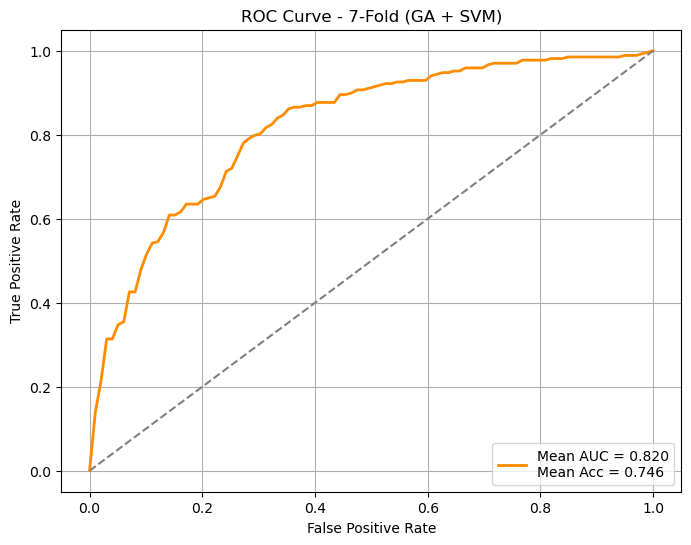


--- 9-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7326, 0.7442, 0.7326, 0.8353, 0.8118, 0.6588, 0.8, 0.7294, 0.7529]
Average Accuracy: 0.7553
Average AUC: 0.7997


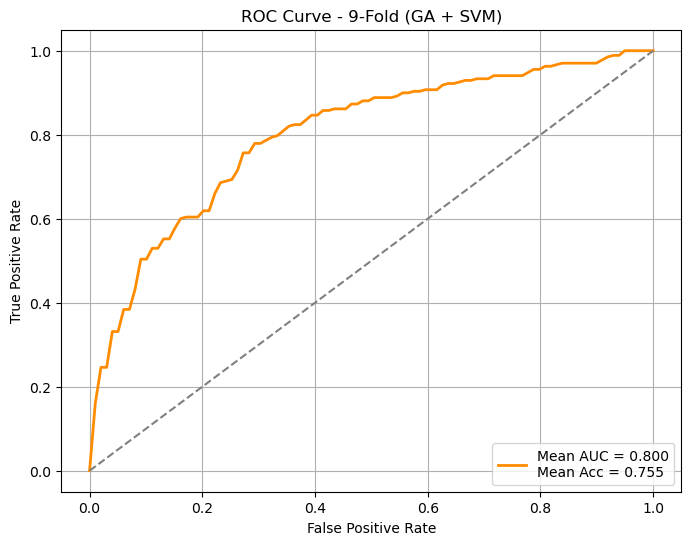


--- 10-Fold Cross-Validation (GA + SVM) ---
Accuracies per fold: [0.7403, 0.7532, 0.7143, 0.8701, 0.7532, 0.7662, 0.7532, 0.7403, 0.7632, 0.75]
Average Accuracy: 0.7604
Average AUC: 0.8148


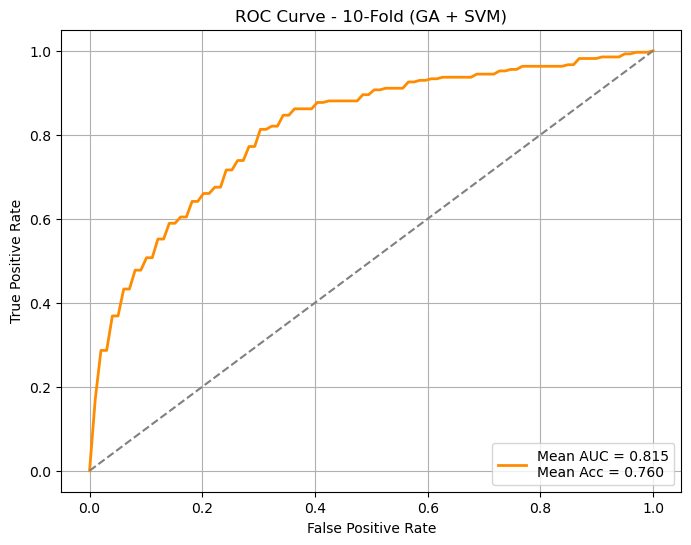

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

from deap import base, creator, tools, algorithms
import random

# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv('d.csv')  # Update path
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Standardize features for SVM
scaler = StandardScaler()
X = scaler.fit_transform(X)

n_features = X.shape[1]

# --------------------------
# GA Feature Selection Setup
# --------------------------
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_individual(individual):
    if sum(individual) == 0:  # No features selected
        return 0.0,
    X_selected = X_train[:, np.array(individual) == 1]
    model = SVC(kernel='rbf', probability=True, random_state=42)
    scores = cross_val_score(model, X_selected, y_train, cv=3)
    return scores.mean(),

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# --------------------------
# K-Fold CV with GA + SVM + ROC
# --------------------------
folds_list = [3, 5, 7, 9, 10]

for k in folds_list:
    print(f"\n--- {k}-Fold Cross-Validation (GA + SVM) ---")
    cv_outer = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    fold_acc = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv_outer.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # GA optimization
        pop = toolbox.population(n=20)
        hof = tools.HallOfFame(1)
        algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10,
                            halloffame=hof, verbose=False)

        best_features = np.array(hof[0])
        selected_features = np.where(best_features == 1)[0]

        # Train SVM on selected features
        model = SVC(kernel='rbf', probability=True, random_state=42)
        model.fit(X_train[:, selected_features], y_train)
        y_pred = model.predict(X_test[:, selected_features])
        y_prob = model.predict_proba(X_test[:, selected_features])[:, 1]

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        fold_acc.append(acc)

        # ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Mean ROC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    mean_acc = np.mean(fold_acc)

    print(f"Accuracies per fold: {[round(a, 4) for a in fold_acc]}")
    print(f"Average Accuracy: {mean_acc:.4f}")
    print(f"Average AUC: {mean_auc:.4f}")

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='darkorange',
             lw=2, label=f'Mean AUC = {mean_auc:.3f}\nMean Acc = {mean_acc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {k}-Fold (GA + SVM)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



--- 3-Fold Cross-Validation (GA + RFC) ---
Accuracies per fold: [0.7461, 0.793, 0.7344]
Average Accuracy: 0.7578
Average AUC: 0.8046


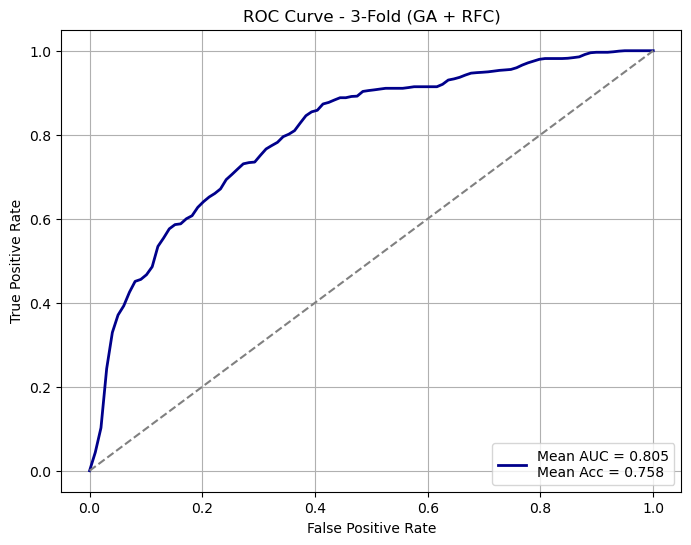


--- 5-Fold Cross-Validation (GA + RFC) ---
Accuracies per fold: [0.7857, 0.7792, 0.7792, 0.7778, 0.7255]
Average Accuracy: 0.7695
Average AUC: 0.8243


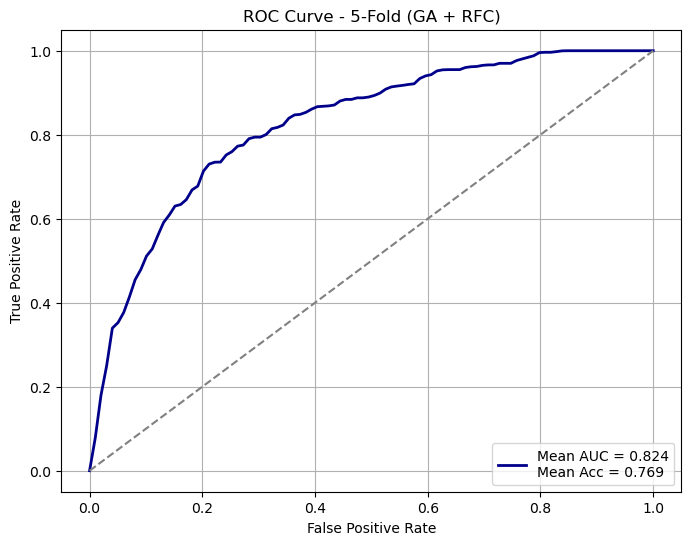


--- 7-Fold Cross-Validation (GA + RFC) ---
Accuracies per fold: [0.7455, 0.7636, 0.7545, 0.7727, 0.7273, 0.7248, 0.7064]
Average Accuracy: 0.7421
Average AUC: 0.8111


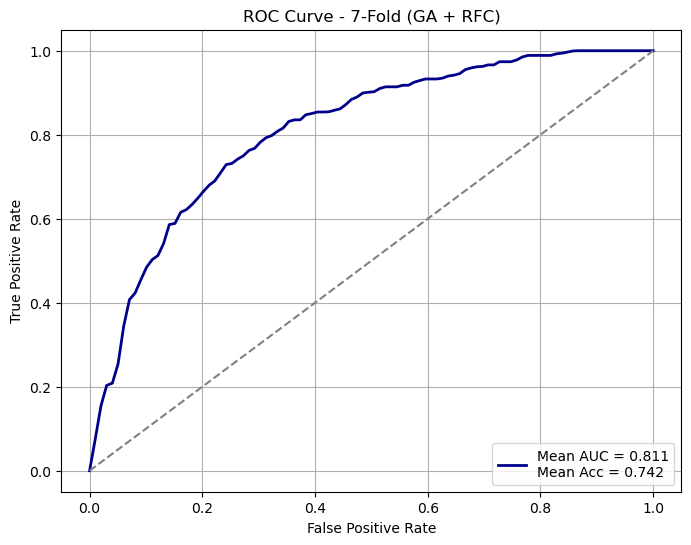


--- 9-Fold Cross-Validation (GA + RFC) ---
Accuracies per fold: [0.814, 0.7558, 0.7442, 0.8235, 0.8235, 0.6824, 0.7529, 0.6941, 0.6941]
Average Accuracy: 0.7538
Average AUC: 0.8152


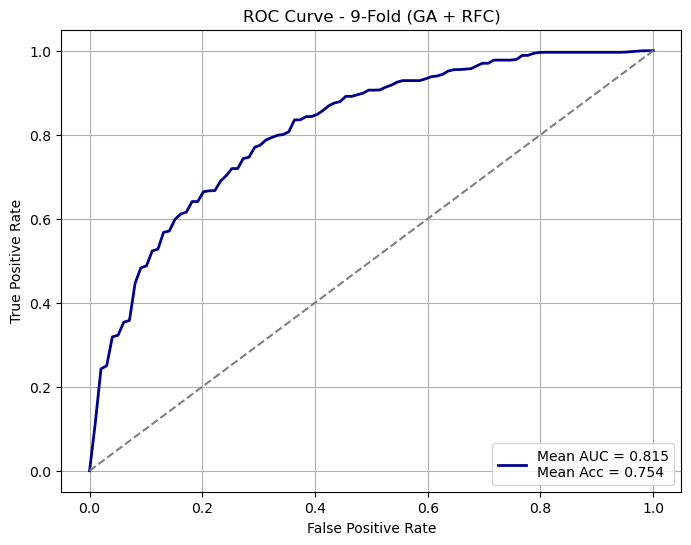


--- 10-Fold Cross-Validation (GA + RFC) ---
Accuracies per fold: [0.8312, 0.7922, 0.7403, 0.8701, 0.8312, 0.7403, 0.7532, 0.7403, 0.75, 0.7237]
Average Accuracy: 0.7772
Average AUC: 0.8299


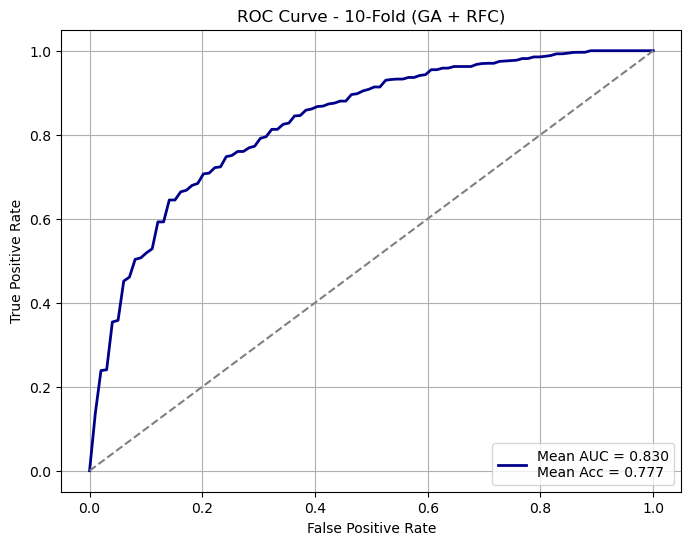

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

from deap import base, creator, tools, algorithms
import random

# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv('d.csv')  # Update path
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Standardize features (RFC doesn't need it, but keeping for consistency)
scaler = StandardScaler()
X = scaler.fit_transform(X)

n_features = X.shape[1]

# --------------------------
# GA Feature Selection Setup
# --------------------------
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_individual(individual):
    if sum(individual) == 0:  # No features selected
        return 0.0,
    X_selected = X_train[:, np.array(individual) == 1]
    model = RandomForestClassifier(
        n_estimators=200, random_state=42
    )
    scores = cross_val_score(model, X_selected, y_train, cv=3)
    return scores.mean(),

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# --------------------------
# K-Fold CV with GA + RFC + ROC
# --------------------------
folds_list = [3, 5, 7, 9, 10]

for k in folds_list:
    print(f"\n--- {k}-Fold Cross-Validation (GA + RFC) ---")
    cv_outer = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    fold_acc = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv_outer.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # GA optimization
        pop = toolbox.population(n=20)
        hof = tools.HallOfFame(1)
        algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10,
                            halloffame=hof, verbose=False)

        best_features = np.array(hof[0])
        selected_features = np.where(best_features == 1)[0]

        # Train RFC on selected features
        model = RandomForestClassifier(
            n_estimators=200, random_state=42
        )
        model.fit(X_train[:, selected_features], y_train)
        y_pred = model.predict(X_test[:, selected_features])
        y_prob = model.predict_proba(X_test[:, selected_features])[:, 1]

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        fold_acc.append(acc)

        # ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Mean ROC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    mean_acc = np.mean(fold_acc)

    print(f"Accuracies per fold: {[round(a, 4) for a in fold_acc]}")
    print(f"Average Accuracy: {mean_acc:.4f}")
    print(f"Average AUC: {mean_auc:.4f}")

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='darkblue',
             lw=2, label=f'Mean AUC = {mean_auc:.3f}\nMean Acc = {mean_acc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {k}-Fold (GA + RFC)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


In [90]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv("d.csv")
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Genetic Algorithm components
def fitness_function(chromosome, X_data, y_data):
    selected = [i for i, bit in enumerate(chromosome) if bit == 1]
    if len(selected) == 0:
        return 0
    X_sel = X_data[:, selected]
    scores = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_idx, test_idx in skf.split(X_sel, y_data):
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_sel[train_idx], y_data.iloc[train_idx])
        pred = model.predict(X_sel[test_idx])
        scores.append(accuracy_score(y_data.iloc[test_idx], pred))
    return np.mean(scores)

def crossover(p1, p2):
    point = random.randint(1, len(p1) - 2)
    return p1[:point] + p2[point:]

def mutate(chromosome, mutation_rate=0.1):
    return [bit if random.random() > mutation_rate else 1 - bit for bit in chromosome]

# GA parameters
population_size = 20
generations = 10
num_features = X.shape[1]
population = [np.random.randint(0, 2, num_features).tolist() for _ in range(population_size)]

# Run Genetic Algorithm
for gen in range(generations):
    fitnesses = [fitness_function(ind, X_scaled, y) for ind in population]
    new_population = []
    for _ in range(population_size // 2):
        parents = random.sample(population, 2)
        child1 = mutate(crossover(parents[0], parents[1]))
        child2 = mutate(crossover(parents[1], parents[0]))
        new_population.extend([child1, child2])
    population = new_population

# Final evaluation
fitnesses = [fitness_function(ind, X_scaled, y) for ind in population]
best_idx = np.argmax(fitnesses)
best_chromosome = population[best_idx]
best_features = [X.columns[i] for i in range(num_features) if best_chromosome[i] == 1]

# Final Accuracy
print("Selected Features:", best_features)
print("Best Cross-Validated Accuracy:", fitnesses[best_idx])


Selected Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Best Cross-Validated Accuracy: 0.7721076309311604


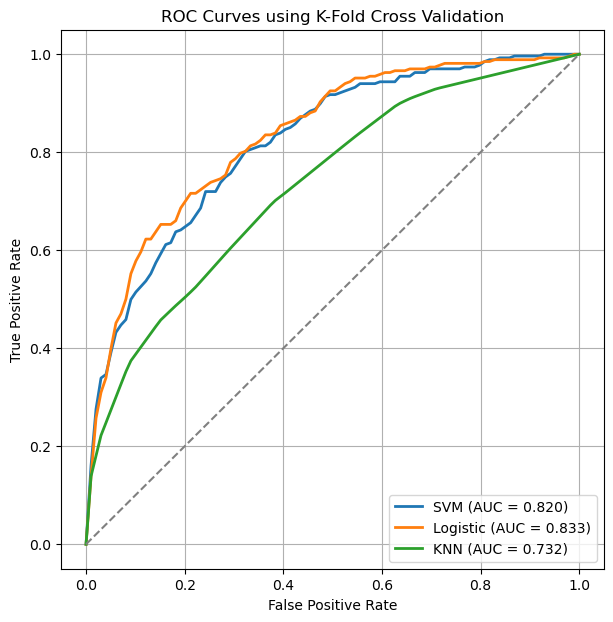

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Load Data
df = pd.read_csv('d.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Initialize models
models = {
    "SVM": SVC(probability=True, max_iter=1000, random_state=40),
    "Logistic": LogisticRegression(max_iter=1000, random_state=40),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

# KFold setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results for plotting
plt.figure(figsize=(7, 7), dpi=100)

for model_name, model in models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for ROC

        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Average TPR and AUC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.3f})', lw=2)

# Plot ROC settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves using K-Fold Cross Validation')
plt.legend(loc='lower right')
plt.grid()
plt.show()


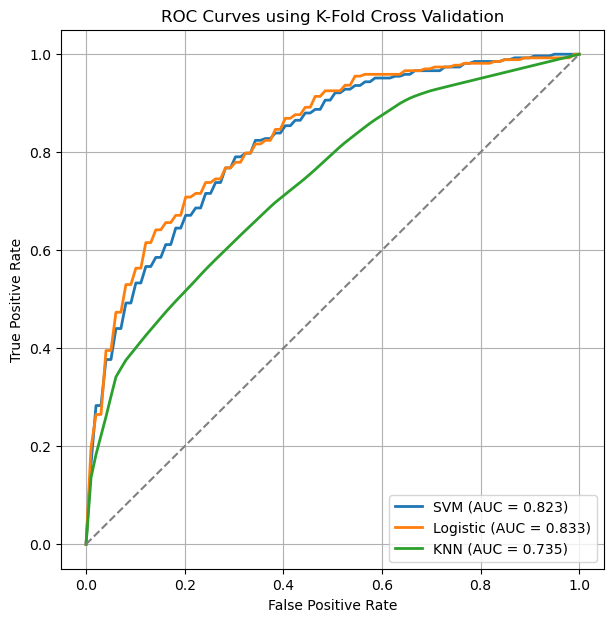

In [91]:
# Initialize models
models = {
    "SVM": SVC(probability=True, max_iter=1000, random_state=40),
    "Logistic": LogisticRegression(max_iter=1000, random_state=40),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

# KFold setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results for plotting
plt.figure(figsize=(7, 7), dpi=100)

for model_name, model in models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for ROC

        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Average TPR and AUC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.3f})', lw=2)

# Plot ROC settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves using K-Fold Cross Validation')
plt.legend(loc='lower right')
plt.grid()
plt.show()


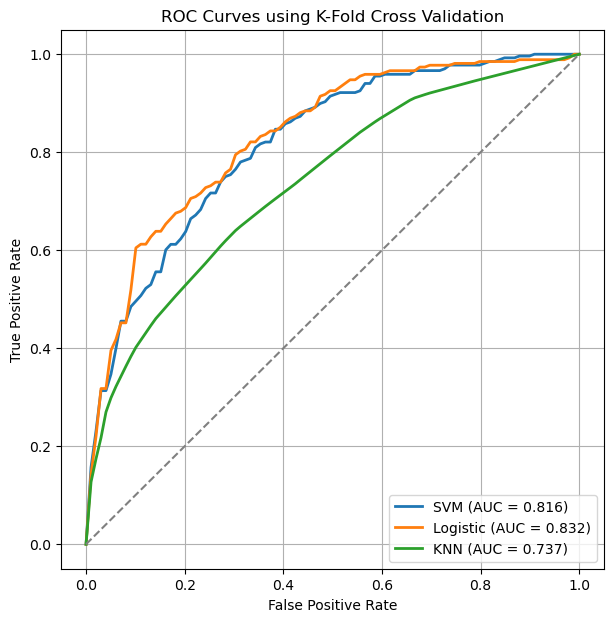

In [92]:
# Initialize models
models = {
    "SVM": SVC(probability=True, max_iter=1000, random_state=40),
    "Logistic": LogisticRegression(max_iter=1000, random_state=40),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

# KFold setup
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Store results for plotting
plt.figure(figsize=(7, 7), dpi=100)

for model_name, model in models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for ROC

        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Average TPR and AUC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.3f})', lw=2)

# Plot ROC settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves using K-Fold Cross Validation')
plt.legend(loc='lower right')
plt.grid()
plt.show()


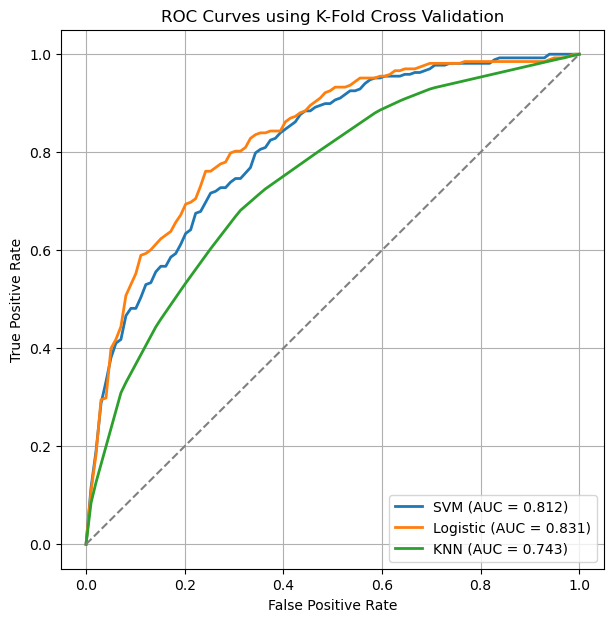

In [96]:
# Initialize models
models = {
    "SVM": SVC(probability=True, max_iter=1000, random_state=40),
    "Logistic": LogisticRegression(max_iter=1000, random_state=40),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

# KFold setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Store results for plotting
plt.figure(figsize=(7, 7), dpi=100)

for model_name, model in models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for ROC

        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Average TPR and AUC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.3f})', lw=2)

# Plot ROC settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves using K-Fold Cross Validation')
plt.legend(loc='lower right')
plt.grid()
plt.show()


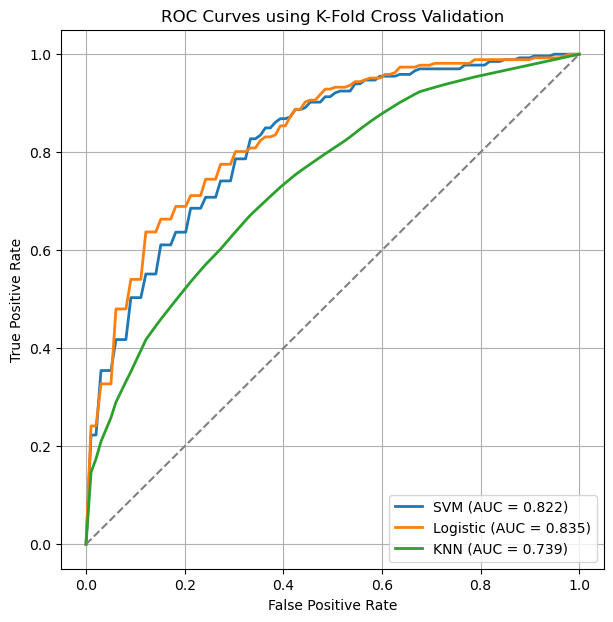

In [98]:
# Initialize models
models = {
    "SVM": SVC(probability=True, max_iter=1000, random_state=40),
    "Logistic": LogisticRegression(max_iter=1000, random_state=40),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

# KFold setup
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

# Store results for plotting
plt.figure(figsize=(7, 7), dpi=100)

for model_name, model in models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for ROC

        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Average TPR and AUC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.3f})', lw=2)

# Plot ROC settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves using K-Fold Cross Validation')
plt.legend(loc='lower right')
plt.grid()
plt.show()



🔍 Tuning SVM...
✅ Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

🔍 Tuning Logistic...
✅ Best Params: {'C': 10, 'solver': 'lbfgs'}

🔍 Tuning KNN...
✅ Best Params: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}


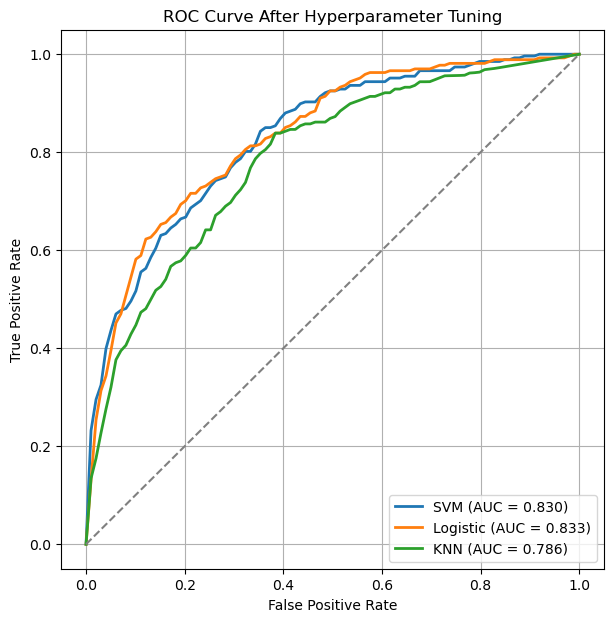

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Load dataset
df = pd.read_csv('d.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define parameter grids
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Logistic": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski']
    }
}

# Models
models = {
    "SVM": SVC(probability=True, max_iter=1000),
    "Logistic": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

# Setup for ROC
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(7, 7), dpi=100)

# Iterate over models
for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grids[name],
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)

    grid.fit(X, y)
    print("✅ Best Params:", grid.best_params_)
    best_model = grid.best_estimator_

    # ROC with outer CV using best model
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv_outer.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_model.fit(X_train, y_train)
        y_probs = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.3f})', lw=2)

# Plot styling
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve After Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.grid()
plt.show()



🔍 Tuning SVM...
✅ Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

📊 Confusion Matrices for SVM (5-Fold CV):


<Figure size 700x700 with 0 Axes>

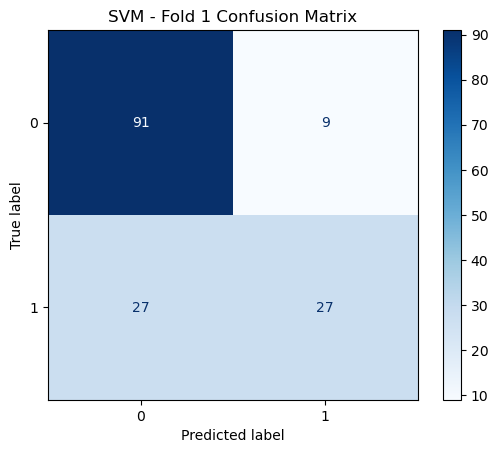

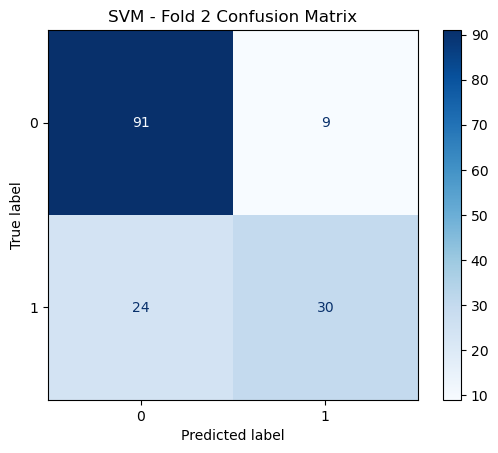

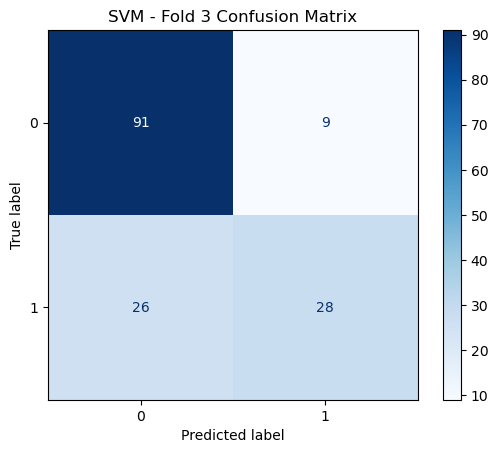

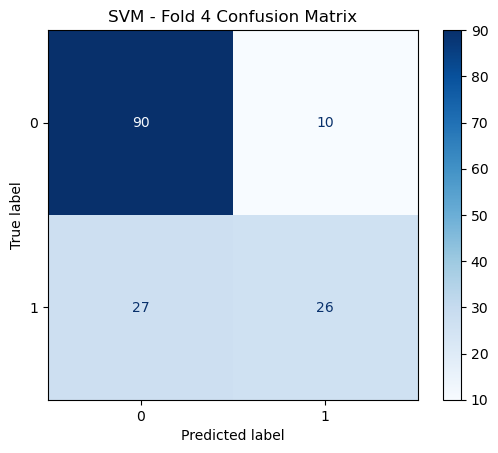

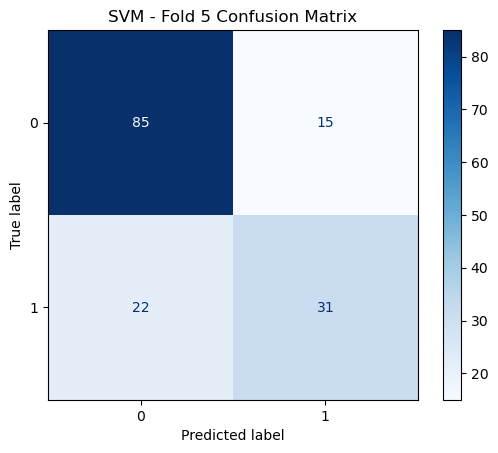


🔍 Tuning Logistic...
✅ Best Params: {'C': 10, 'solver': 'lbfgs'}

📊 Confusion Matrices for Logistic (5-Fold CV):


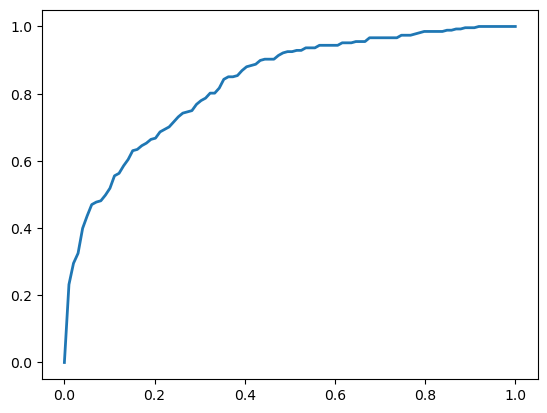

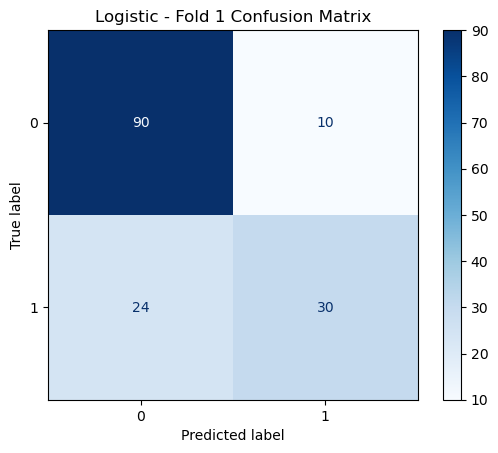

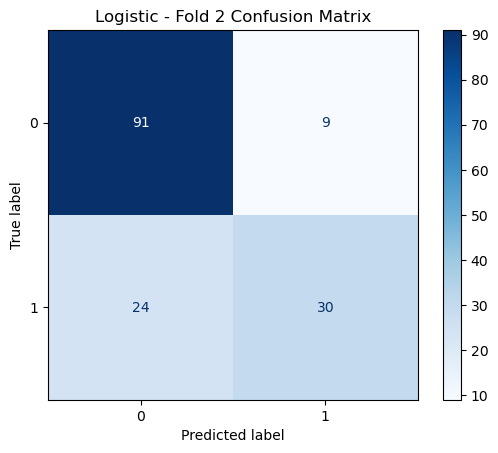

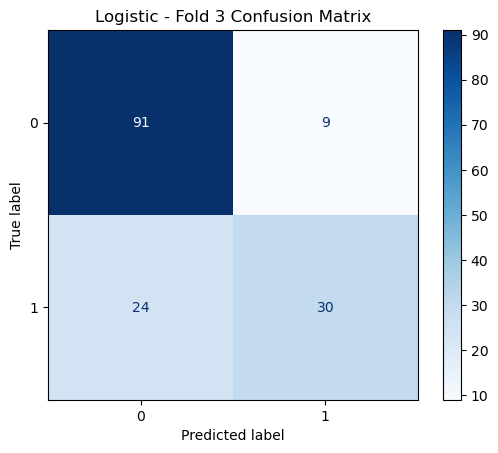

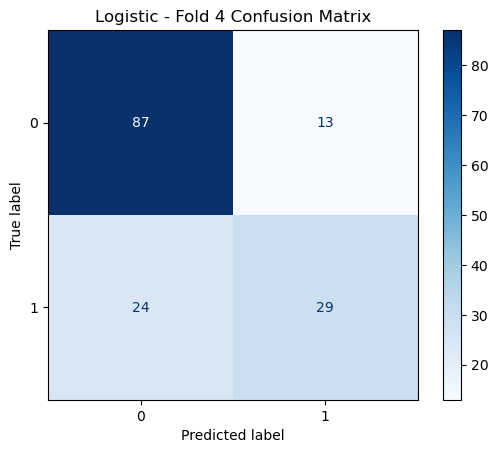

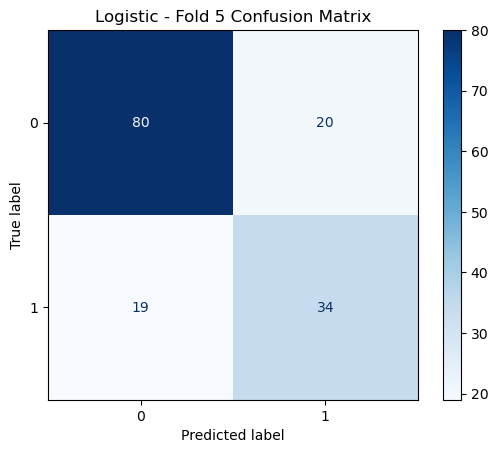


🔍 Tuning KNN...
✅ Best Params: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

📊 Confusion Matrices for KNN (5-Fold CV):


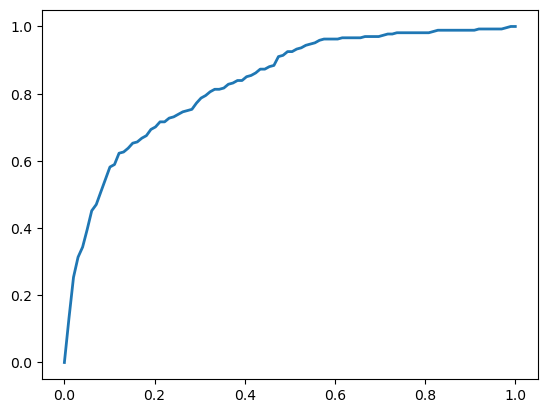

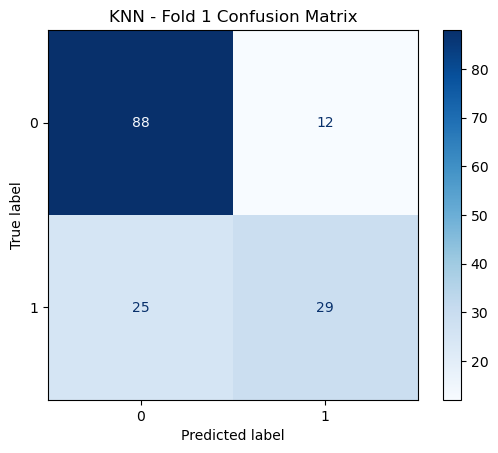

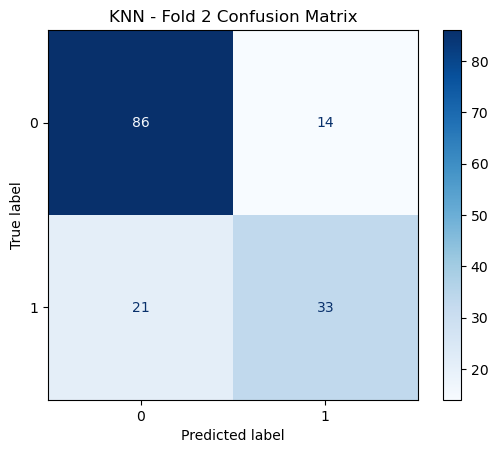

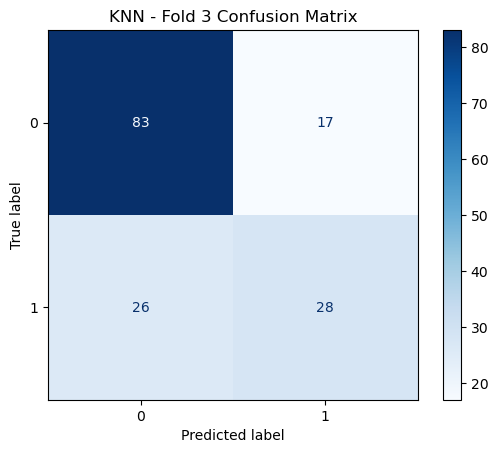

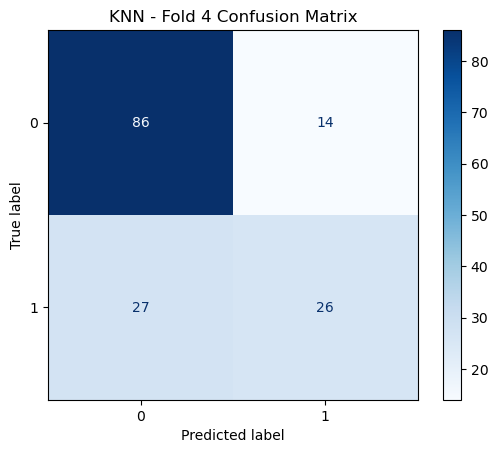

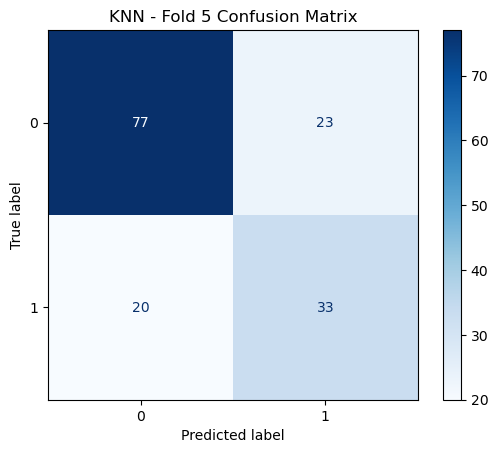

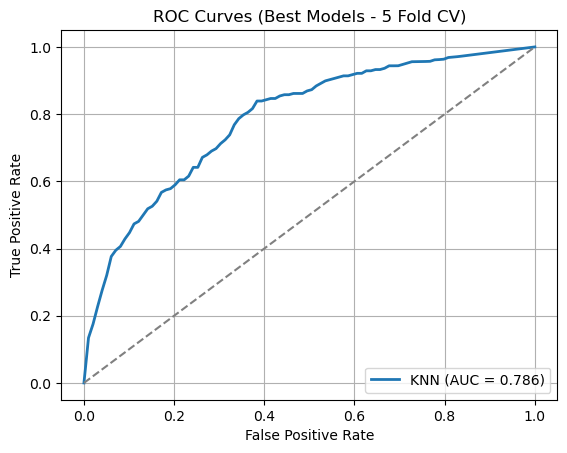

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Load Data
df = pd.read_csv('d.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define parameter grids
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Logistic": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski']
    }
}

# Models
models = {
    "SVM": SVC(probability=True, max_iter=1000),
    "Logistic": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

# Outer CV
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(7, 7), dpi=100)

for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grids[name],
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)

    grid.fit(X, y)
    best_model = grid.best_estimator_
    print("✅ Best Params:", grid.best_params_)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    print(f"\n📊 Confusion Matrices for {name} (5-Fold CV):")
    fold_num = 1

    for train_idx, test_idx in cv_outer.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_model.fit(X_train, y_train)
        y_probs = best_model.predict_proba(X_test)[:, 1]
        y_pred = best_model.predict(X_test)

        # ROC
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc(fpr, tpr))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f'{name} - Fold {fold_num} Confusion Matrix')
        plt.show()

        fold_num += 1

    # ROC Average
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.3f})', lw=2)

# Final ROC Plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Best Models - 5 Fold CV)')
plt.legend(loc='lower right')
plt.grid()
plt.show()



🔍 Tuning SVM...
✅ Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

📊 Fold-wise Metrics for SVM:
Fold 1: Precision = 0.750, Recall = 0.500, F1-score = 0.600


<Figure size 700x700 with 0 Axes>

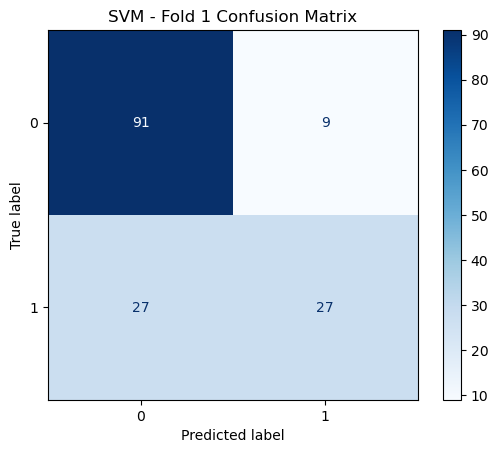

Fold 2: Precision = 0.769, Recall = 0.556, F1-score = 0.645


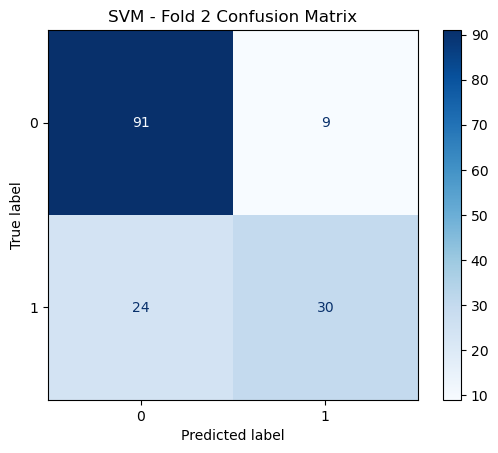

Fold 3: Precision = 0.757, Recall = 0.519, F1-score = 0.615


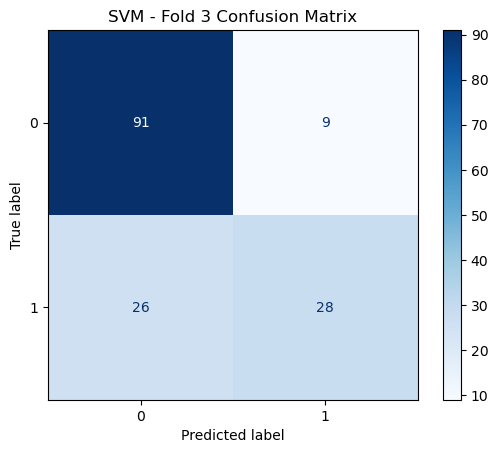

Fold 4: Precision = 0.722, Recall = 0.491, F1-score = 0.584


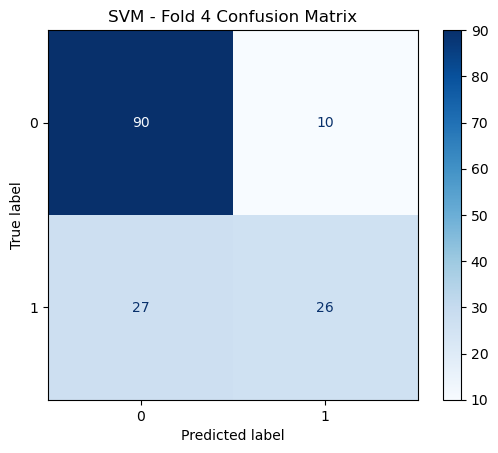

Fold 5: Precision = 0.674, Recall = 0.585, F1-score = 0.626


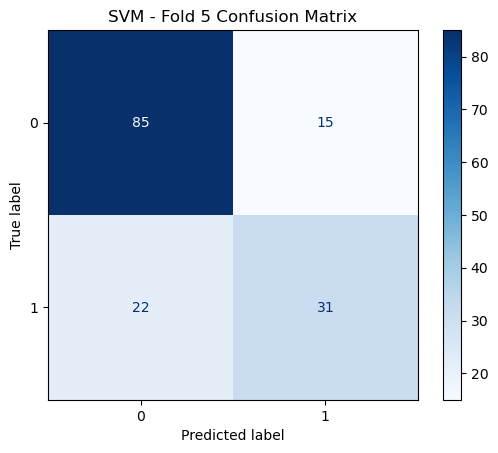


🔍 Tuning Logistic...
✅ Best Params: {'C': 10, 'solver': 'lbfgs'}

📊 Fold-wise Metrics for Logistic:
Fold 1: Precision = 0.750, Recall = 0.556, F1-score = 0.638


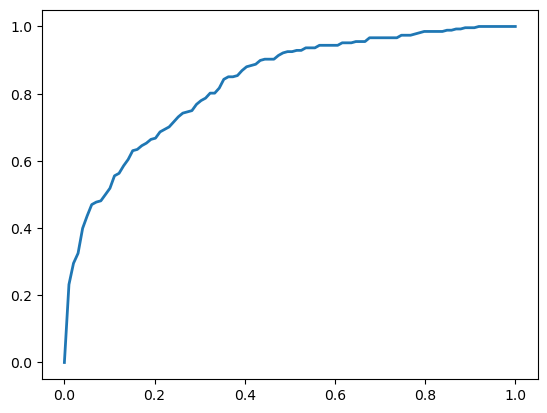

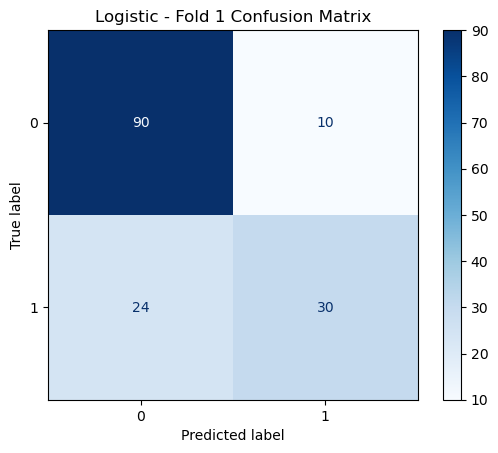

Fold 2: Precision = 0.769, Recall = 0.556, F1-score = 0.645


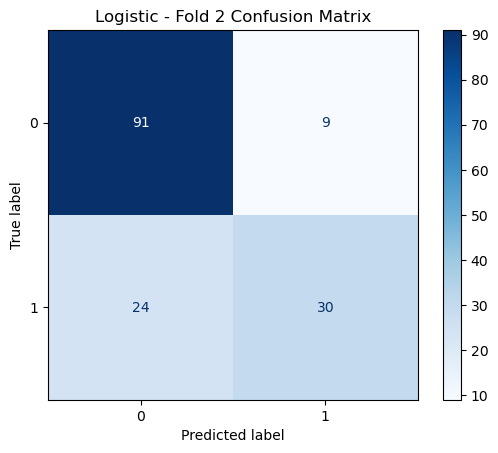

Fold 3: Precision = 0.769, Recall = 0.556, F1-score = 0.645


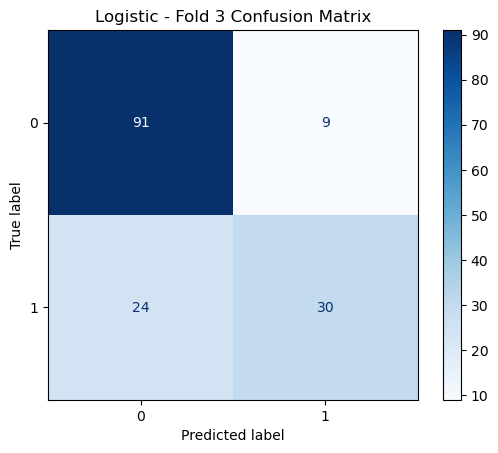

Fold 4: Precision = 0.690, Recall = 0.547, F1-score = 0.611


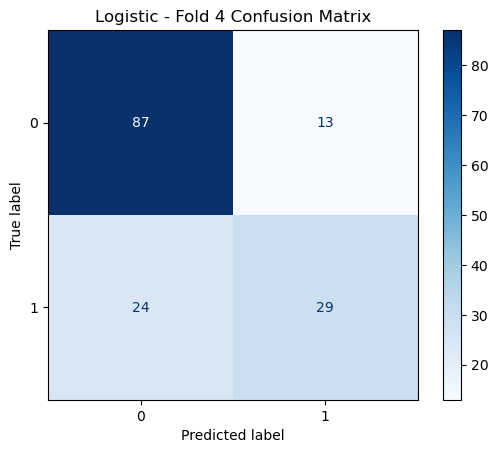

Fold 5: Precision = 0.630, Recall = 0.642, F1-score = 0.636


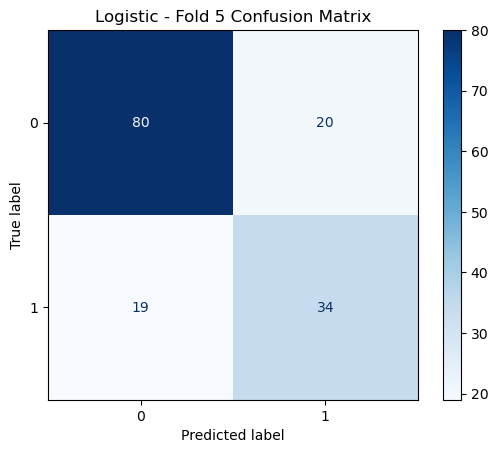


🔍 Tuning KNN...
✅ Best Params: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

📊 Fold-wise Metrics for KNN:
Fold 1: Precision = 0.707, Recall = 0.537, F1-score = 0.611


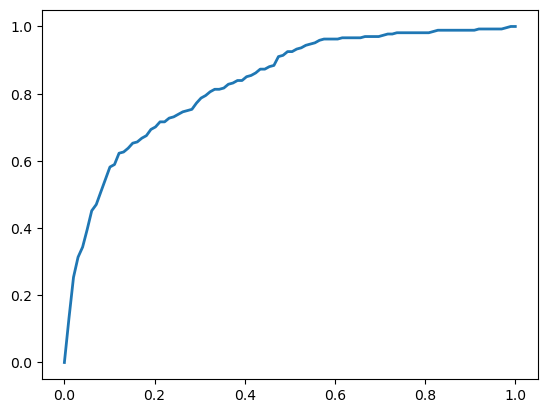

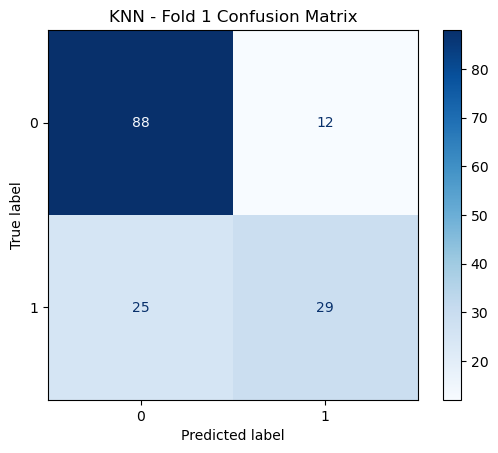

Fold 2: Precision = 0.702, Recall = 0.611, F1-score = 0.653


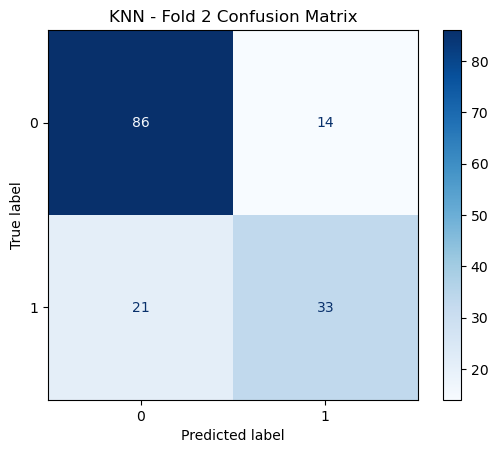

Fold 3: Precision = 0.622, Recall = 0.519, F1-score = 0.566


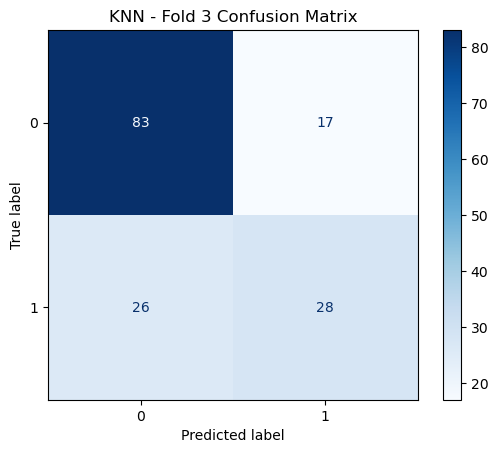

Fold 4: Precision = 0.650, Recall = 0.491, F1-score = 0.559


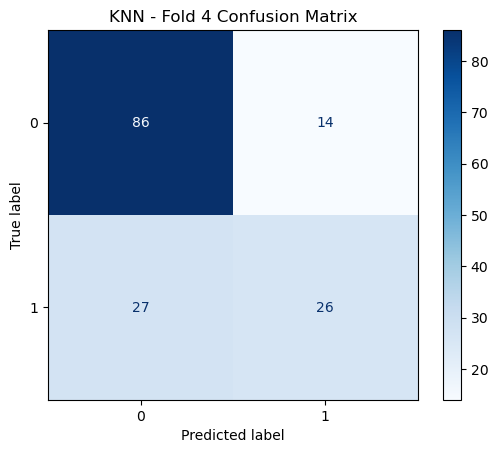

Fold 5: Precision = 0.589, Recall = 0.623, F1-score = 0.606


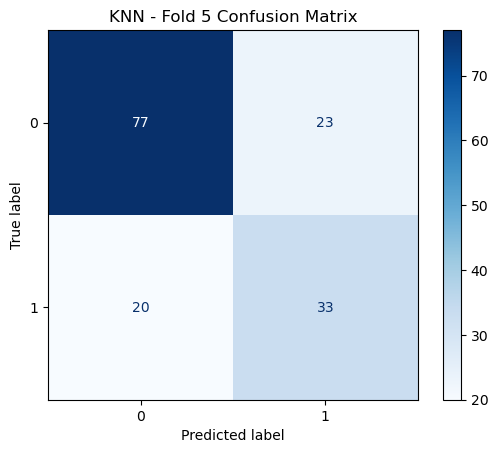

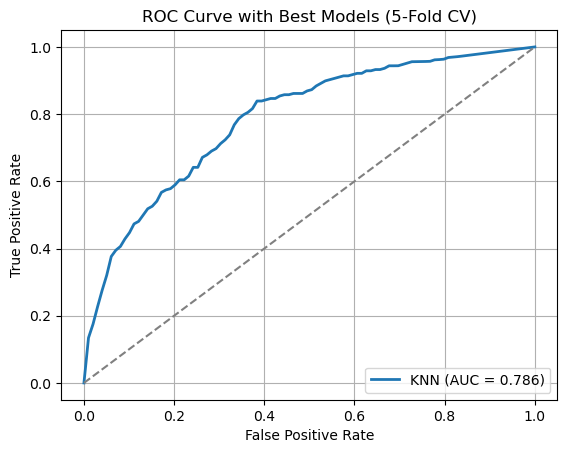


📌 Summary of Average Metrics (5-Fold):

🧠 SVM:
  ➤ Mean Precision: 0.734
  ➤ Mean Recall:    0.530
  ➤ Mean F1-score:  0.614

🧠 Logistic:
  ➤ Mean Precision: 0.722
  ➤ Mean Recall:    0.571
  ➤ Mean F1-score:  0.635

🧠 KNN:
  ➤ Mean Precision: 0.654
  ➤ Mean Recall:    0.556
  ➤ Mean F1-score:  0.599


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)

# Load Data
df = pd.read_csv('d.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define parameter grids
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Logistic": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski']
    }
}

# Models
models = {
    "SVM": SVC(probability=True, max_iter=1000),
    "Logistic": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

# Outer CV
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(7, 7), dpi=100)

# Store all metrics
all_scores = {}

for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grids[name],
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)

    grid.fit(X, y)
    best_model = grid.best_estimator_
    print("✅ Best Params:", grid.best_params_)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    # Store per-fold metrics
    precision_list = []
    recall_list = []
    f1_list = []

    print(f"\n📊 Fold-wise Metrics for {name}:")
    fold_num = 1

    for train_idx, test_idx in cv_outer.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_model.fit(X_train, y_train)
        y_probs = best_model.predict_proba(X_test)[:, 1]
        y_pred = best_model.predict(X_test)

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc(fpr, tpr))

        # Classification Metrics
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Fold {fold_num}: Precision = {precision:.3f}, Recall = {recall:.3f}, F1-score = {f1:.3f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f'{name} - Fold {fold_num} Confusion Matrix')
        plt.show()

        fold_num += 1

    # Store scores
    all_scores[name] = {
        'Precision': precision_list,
        'Recall': recall_list,
        'F1-score': f1_list,
        'Mean Precision': np.mean(precision_list),
        'Mean Recall': np.mean(recall_list),
        'Mean F1-score': np.mean(f1_list)
    }

    # ROC Averaging
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.3f})', lw=2)

# Final ROC Plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Models (5-Fold CV)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Summary of metrics
print("\n📌 Summary of Average Metrics (5-Fold):")
for model, scores in all_scores.items():
    print(f"\n🧠 {model}:")
    print(f"  ➤ Mean Precision: {scores['Mean Precision']:.3f}")
    print(f"  ➤ Mean Recall:    {scores['Mean Recall']:.3f}")
    print(f"  ➤ Mean F1-score:  {scores['Mean F1-score']:.3f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Load dataset
df = pd.read_csv('d.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define models and parameter grids
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Logistic": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski']
    }
}

models = {
    "SVM": SVC(probability=True, max_iter=1000),
    "Logistic": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

# Scorers
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1-score': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score, needs_proba=True)
}

# Outer CV (model evaluation)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
nested_scores = {}

for model_name in models:
    print(f"\n🔁 Nested Cross-Validation for: {model_name}")
    model = models[model_name]
    param_grid = param_grids[model_name]

    # Inner CV (hyperparameter tuning)
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               cv=inner_cv,
                               scoring='roc_auc',
                               n_jobs=-1)

    # For each scoring metric
    nested_scores[model_name] = {}
    for metric_name, scorer in scorers.items():
        print(f"  ➤ Evaluating {metric_name} ...")
        score = cross_val_score(grid_search, X, y, cv=outer_cv, scoring=scorer, n_jobs=-1)
        nested_scores[model_name][metric_name] = {
            'mean': np.mean(score),
            'std': np.std(score)
        }

# Print Summary
print("\n📊 Summary of Nested CV Performance:")
for model_name, metrics in nested_scores.items():
    print(f"\n🧠 {model_name}")
    for metric, result in metrics.items():
        print(f"  {metric}: {result['mean']:.3f} ± {result['std']:.3f}")



🔁 Nested Cross-Validation for: SVM
  ➤ Evaluating Accuracy ...
  ➤ Evaluating Precision ...
  ➤ Evaluating Recall ...
  ➤ Evaluating F1-score ...
  ➤ Evaluating ROC AUC ...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Load data
df = pd.read_csv('d.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Model + param grids
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Logistic": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski']
    }
}

models = {
    "SVM": SVC(probability=True, max_iter=1000),
    "Logistic": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

# Outer CV loop (true generalization test)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(8, 8), dpi=100)

# Loop over each model
for model_name, base_model in models.items():
    print(f"\n🎯 Nested ROC: {model_name}")
    param_grid = param_grids[model_name]

    outer_true = []
    outer_probs = []

    for train_idx, test_idx in outer_cv.split(X, y):
        # Split outer fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Inner tuning
        inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid = GridSearchCV(estimator=base_model,
                            param_grid=param_grid,
                            cv=inner_cv,
                            scoring='roc_auc',
                            n_jobs=-1)

        # Fit and predict
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_

        y_prob = best_model.predict_proba(X_test)[:, 1]  # Prob for class=1
        outer_probs.extend(y_prob)
        outer_true.extend(y_test)

    # Final ROC and AUC
    fpr, tpr, _ = roc_curve(outer_true, outer_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

# ROC plot config
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested CV ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load data
df = pd.read_csv('d.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define parameter grids for all models
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Logistic": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski']
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
}

# Define base models
models = {
    "SVM": SVC(probability=True, max_iter=1000, random_state=42),
    "Logistic": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Outer cross-validation loop
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(8, 8), dpi=100)

# Loop through each model
for model_name, base_model in models.items():
    print(f"\n🎯 Nested ROC: {model_name}")
    param_grid = param_grids[model_name]

    outer_true = []
    outer_probs = []

    for train_idx, test_idx in outer_cv.split(X, y):
        # Split data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Inner cross-validation for hyperparameter tuning
        inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid = GridSearchCV(estimator=base_model,
                            param_grid=param_grid,
                            cv=inner_cv,
                            scoring='roc_auc',
                            n_jobs=-1)

        # Fit on train split and get best model
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_

        # Predict probabilities
        y_prob = best_model.predict_proba(X_test)[:, 1]
        outer_probs.extend(y_prob)
        outer_true.extend(y_test)

    # Compute ROC and AUC
    fpr, tpr, _ = roc_curve(outer_true, outer_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Final ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested CV ROC Curve Comparison (SVM, Logistic, KNN, RFC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
